In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import time

In [2]:
df  = pd.read_csv("boston.csv", index_col = 0)

In [3]:
# split into input and target variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

# scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
X.shape

(506, 13)

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [6]:
class ANNRegressor:
    def __init__(self, n_input, n_hidden, n_output):
        self.weights1 = np.random.randn(n_input, n_hidden)
        self.bias1 = np.zeros((1, n_hidden))
        self.weights2 = np.random.randn(n_hidden, n_output)
        self.bias2 = np.zeros((1, n_output))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.y_pred = self.relu(self.z2)
        return self.y_pred

    def backward(self, X, y, y_pred, learning_rate):
        m = X.shape[0]
        error = y_pred - y
        delta2 = error
        d_weights2 = np.dot(self.a1.T, delta2)
        d_bias2 = np.sum(delta2, axis=0, keepdims=True)
        delta1 = np.dot(delta2, self.weights2.T) * self.a1 * (1 - self.a1)
        d_weights1 = np.dot(X.T, delta1)
        d_bias1 = np.sum(delta1, axis=0)

        # Update the weights and biases
        self.weights1 -= learning_rate * d_weights1 / m
        self.bias1 -= learning_rate * d_bias1 / m
        self.weights2 -= learning_rate * d_weights2 / m
        self.bias2 -= learning_rate * d_bias2 / m

    def train(self, X, y, n_epochs, learning_rate):
        start_time = time.time()  # Record start time
        for i in range(n_epochs):
            epoch_start_time = time.time()  # Record start time of epoch
            y_pred = self.forward(X)
            self.backward(X, y, y_pred, learning_rate)
            epoch_end_time = time.time()  # Record end time of epoch
            step_time = epoch_end_time - epoch_start_time  # Calculate step time
            print("Epoch:", i+1, "Step Time:", step_time)
        end_time = time.time()  # Record end time
        elapsed_time = end_time - start_time  # Calculate elapsed time
        print("Elapsed Time:", elapsed_time)


In [7]:
# Initialize the neural network with 13 input nodes, 5 hidden nodes, and 1 output node
n_input = X_train.shape[1]
n_hidden = 5
n_output = 1
nn = ANNRegressor(n_input, n_hidden, n_output)

# Train the neural network and evaluate its performance on the test set
learning_rate = 0.01
n_epochs = 1500

In [8]:
start_time = time.time()
nn.train(X_train, y_train, n_epochs, learning_rate)
end_time = time.time()

print("Training time:", end_time - start_time, "seconds")
y_pred = nn.forward(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:", mse)

Epoch: 1 Step Time: 0.03989243507385254
Epoch: 2 Step Time: 0.0010006427764892578
Epoch: 3 Step Time: 0.0010004043579101562
Epoch: 4 Step Time: 0.0010001659393310547
Epoch: 5 Step Time: 0.0019948482513427734
Epoch: 6 Step Time: 0.0019936561584472656
Epoch: 7 Step Time: 0.0009946823120117188
Epoch: 8 Step Time: 0.0009975433349609375
Epoch: 9 Step Time: 0.002000570297241211
Epoch: 10 Step Time: 0.0019893646240234375
Epoch: 11 Step Time: 0.001997232437133789
Epoch: 12 Step Time: 0.0009968280792236328
Epoch: 13 Step Time: 0.0009982585906982422
Epoch: 14 Step Time: 0.0009999275207519531
Epoch: 15 Step Time: 0.001993417739868164
Epoch: 16 Step Time: 0.0009942054748535156
Epoch: 17 Step Time: 0.0009970664978027344
Epoch: 18 Step Time: 0.001996278762817383
Epoch: 19 Step Time: 0.000993490219116211
Epoch: 20 Step Time: 0.0019948482513427734
Epoch: 21 Step Time: 0.0019958019256591797
Epoch: 22 Step Time: 0.000997304916381836
Epoch: 23 Step Time: 0.000997304916381836
Epoch: 24 Step Time: 0.000994

Epoch: 223 Step Time: 0.001992940902709961
Epoch: 224 Step Time: 0.0019953250885009766
Epoch: 225 Step Time: 0.0019922256469726562
Epoch: 226 Step Time: 0.0009980201721191406
Epoch: 227 Step Time: 0.0009970664978027344
Epoch: 228 Step Time: 0.0019941329956054688
Epoch: 229 Step Time: 0.0009982585906982422
Epoch: 230 Step Time: 0.001995086669921875
Epoch: 231 Step Time: 0.000997304916381836
Epoch: 232 Step Time: 0.0009999275207519531
Epoch: 233 Step Time: 0.0019931793212890625
Epoch: 234 Step Time: 0.002001047134399414
Epoch: 235 Step Time: 0.002985715866088867
Epoch: 236 Step Time: 0.001995086669921875
Epoch: 237 Step Time: 0.0009965896606445312
Epoch: 238 Step Time: 0.000997304916381836
Epoch: 239 Step Time: 0.0009980201721191406
Epoch: 240 Step Time: 0.000997781753540039
Epoch: 241 Step Time: 0.0009961128234863281
Epoch: 242 Step Time: 0.0009961128234863281
Epoch: 243 Step Time: 0.0009984970092773438
Epoch: 244 Step Time: 0.000997781753540039
Epoch: 245 Step Time: 0.00099730491638183

Epoch: 515 Step Time: 0.001993894577026367
Epoch: 516 Step Time: 0.001995563507080078
Epoch: 517 Step Time: 0.0019974708557128906
Epoch: 518 Step Time: 0.000993490219116211
Epoch: 519 Step Time: 0.0009999275207519531
Epoch: 520 Step Time: 0.0009958744049072266
Epoch: 521 Step Time: 0.001996278762817383
Epoch: 522 Step Time: 0.0009958744049072266
Epoch: 523 Step Time: 0.0009968280792236328
Epoch: 524 Step Time: 0.001994609832763672
Epoch: 525 Step Time: 0.000997304916381836
Epoch: 526 Step Time: 0.0009980201721191406
Epoch: 527 Step Time: 0.001995086669921875
Epoch: 528 Step Time: 0.0010001659393310547
Epoch: 529 Step Time: 0.0009965896606445312
Epoch: 530 Step Time: 0.0009975433349609375
Epoch: 531 Step Time: 0.001994609832763672
Epoch: 532 Step Time: 0.0009963512420654297
Epoch: 533 Step Time: 0.0009982585906982422
Epoch: 534 Step Time: 0.001993417739868164
Epoch: 535 Step Time: 0.0009968280792236328
Epoch: 536 Step Time: 0.001993894577026367
Epoch: 537 Step Time: 0.000996828079223632

Epoch: 786 Step Time: 0.0019922256469726562
Epoch: 787 Step Time: 0.001996755599975586
Epoch: 788 Step Time: 0.0019943714141845703
Epoch: 789 Step Time: 0.0019948482513427734
Epoch: 790 Step Time: 0.000997304916381836
Epoch: 791 Step Time: 0.0009968280792236328
Epoch: 792 Step Time: 0.0019958019256591797
Epoch: 793 Step Time: 0.0009968280792236328
Epoch: 794 Step Time: 0.0019953250885009766
Epoch: 795 Step Time: 0.0009961128234863281
Epoch: 796 Step Time: 0.0019991397857666016
Epoch: 797 Step Time: 0.002989053726196289
Epoch: 798 Step Time: 0.0009992122650146484
Epoch: 799 Step Time: 0.0009980201721191406
Epoch: 800 Step Time: 0.0009984970092773438
Epoch: 801 Step Time: 0.0009970664978027344
Epoch: 802 Step Time: 0.0009975433349609375
Epoch: 803 Step Time: 0.0009975433349609375
Epoch: 804 Step Time: 0.001994609832763672
Epoch: 805 Step Time: 0.0009946823120117188
Epoch: 806 Step Time: 0.0009975433349609375
Epoch: 807 Step Time: 0.000997781753540039
Epoch: 808 Step Time: 0.0009975433349

Epoch: 1032 Step Time: 0.0009975433349609375
Epoch: 1033 Step Time: 0.000995635986328125
Epoch: 1034 Step Time: 0.001996755599975586
Epoch: 1035 Step Time: 0.0009965896606445312
Epoch: 1036 Step Time: 0.0009944438934326172
Epoch: 1037 Step Time: 0.0019943714141845703
Epoch: 1038 Step Time: 0.0009970664978027344
Epoch: 1039 Step Time: 0.0009970664978027344
Epoch: 1040 Step Time: 0.0009984970092773438
Epoch: 1041 Step Time: 0.001994609832763672
Epoch: 1042 Step Time: 0.001995086669921875
Epoch: 1043 Step Time: 0.001995086669921875
Epoch: 1044 Step Time: 0.0009968280792236328
Epoch: 1045 Step Time: 0.0009965896606445312
Epoch: 1046 Step Time: 0.0019943714141845703
Epoch: 1047 Step Time: 0.000997781753540039
Epoch: 1048 Step Time: 0.0
Epoch: 1049 Step Time: 0.0
Epoch: 1050 Step Time: 0.001993417739868164
Epoch: 1051 Step Time: 0.0009963512420654297
Epoch: 1052 Step Time: 0.0009980201721191406
Epoch: 1053 Step Time: 0.001994609832763672
Epoch: 1054 Step Time: 0.0019941329956054688
Epoch: 10

Epoch: 1309 Step Time: 0.00199127197265625
Epoch: 1310 Step Time: 0.0009984970092773438
Epoch: 1311 Step Time: 0.0009961128234863281
Epoch: 1312 Step Time: 0.0009970664978027344
Epoch: 1313 Step Time: 0.001993894577026367
Epoch: 1314 Step Time: 0.0009980201721191406
Epoch: 1315 Step Time: 0.0009965896606445312
Epoch: 1316 Step Time: 0.000997781753540039
Epoch: 1317 Step Time: 0.0009970664978027344
Epoch: 1318 Step Time: 0.0009992122650146484
Epoch: 1319 Step Time: 0.000997304916381836
Epoch: 1320 Step Time: 0.0029947757720947266
Epoch: 1321 Step Time: 0.001993417739868164
Epoch: 1322 Step Time: 0.001993894577026367
Epoch: 1323 Step Time: 0.0009989738464355469
Epoch: 1324 Step Time: 0.0009968280792236328
Epoch: 1325 Step Time: 0.000997304916381836
Epoch: 1326 Step Time: 0.0009970664978027344
Epoch: 1327 Step Time: 0.000997304916381836
Epoch: 1328 Step Time: 0.000997781753540039
Epoch: 1329 Step Time: 0.0009942054748535156
Epoch: 1330 Step Time: 0.000997304916381836
Epoch: 1331 Step Time

In [9]:
score_manual = r2_score(y_test, y_pred)
score_manual

0.8204943245029239

# Hyper Parameter Tuning

In [10]:
import time

start_time = time.time()

# define the range of hyperparameters to search
n_hidden_list = [3, 5, 7]
learning_rate_list = [0.01, 0.001, 0.1]
epochs_list = [500, 1000, 1500]

# initialize variables to keep track of the best hyperparameters and performance
best_n_hidden = None
best_learning_rate = None
best_epochs = None
best_score = float('-inf')

# loop through all possible combinations of hyperparameters
for n_hidden in n_hidden_list:
    for learning_rate in learning_rate_list:
        for n_epochs in epochs_list:
        
            # initialize the neural network with the current hyperparameters
            nn = ANNRegressor(n_input, n_hidden, n_output)

            # train the neural network
            epoch_start_time = time.time()
            nn.train(X_train, y_train, n_epochs, learning_rate)
            epoch_end_time = time.time()

            # evaluate the performance on the test set
            y_pred = nn.forward(X_test)
            score = r2_score(y_test, y_pred)

            # check if the current hyperparameters are the best so far
            if score > best_score:
                best_score = score
                best_n_hidden = n_hidden
                best_learning_rate = learning_rate
                best_epochs = n_epochs
                
            # print the step time and performance for the current hyperparameters
            step_time = epoch_end_time - epoch_start_time
            print(f"n_hidden={n_hidden}, learning_rate={learning_rate}, n_epochs={n_epochs}, R2 score={score:.4f}, Step time={step_time:.4f} seconds")

end_time = time.time()
total_time = end_time - start_time

# print the best hyperparameters and performance, and the total time taken
print("\nBest hyperparameters:")
print(f"Number of hidden nodes: {best_n_hidden}")
print(f"Learning rate: {best_learning_rate}")
print(f"Number of epochs: {best_epochs}")
print(f"R2 score: {best_score:.4f}")
print(f"Total time taken: {total_time:.4f} seconds")


Epoch: 1 Step Time: 0.002988100051879883
Epoch: 2 Step Time: 0.002992868423461914
Epoch: 3 Step Time: 0.0019941329956054688
Epoch: 4 Step Time: 0.0009965896606445312
Epoch: 5 Step Time: 0.000993967056274414
Epoch: 6 Step Time: 0.003992795944213867
Epoch: 7 Step Time: 0.0009961128234863281
Epoch: 8 Step Time: 0.0
Epoch: 9 Step Time: 0.0009975433349609375
Epoch: 10 Step Time: 0.0019919872283935547
Epoch: 11 Step Time: 0.000997304916381836
Epoch: 12 Step Time: 0.00099945068359375
Epoch: 13 Step Time: 0.001992940902709961
Epoch: 14 Step Time: 0.0009970664978027344
Epoch: 15 Step Time: 0.000997781753540039
Epoch: 16 Step Time: 0.0009975433349609375
Epoch: 17 Step Time: 0.0040285587310791016
Epoch: 18 Step Time: 0.000997304916381836
Epoch: 19 Step Time: 0.0019948482513427734
Epoch: 20 Step Time: 0.000997304916381836
Epoch: 21 Step Time: 0.0009968280792236328
Epoch: 22 Step Time: 0.0019941329956054688
Epoch: 23 Step Time: 0.0009999275207519531
Epoch: 24 Step Time: 0.0009975433349609375
Epoch:

Epoch: 249 Step Time: 0.0019919872283935547
Epoch: 250 Step Time: 0.001995086669921875
Epoch: 251 Step Time: 0.0009953975677490234
Epoch: 252 Step Time: 0.0019941329956054688
Epoch: 253 Step Time: 0.0009982585906982422
Epoch: 254 Step Time: 0.000997781753540039
Epoch: 255 Step Time: 0.0010006427764892578
Epoch: 256 Step Time: 0.001993894577026367
Epoch: 257 Step Time: 0.001992940902709961
Epoch: 258 Step Time: 0.001994609832763672
Epoch: 259 Step Time: 0.0009951591491699219
Epoch: 260 Step Time: 0.0010004043579101562
Epoch: 261 Step Time: 0.0
Epoch: 262 Step Time: 0.0009970664978027344
Epoch: 263 Step Time: 0.0009975433349609375
Epoch: 264 Step Time: 0.00099945068359375
Epoch: 265 Step Time: 0.0009970664978027344
Epoch: 266 Step Time: 0.0009975433349609375
Epoch: 267 Step Time: 0.0009965896606445312
Epoch: 268 Step Time: 0.0009970664978027344
Epoch: 269 Step Time: 0.0009982585906982422
Epoch: 270 Step Time: 0.0009984970092773438
Epoch: 271 Step Time: 0.0
Epoch: 272 Step Time: 0.0009968

Epoch: 34 Step Time: 0.0009989738464355469
Epoch: 35 Step Time: 0.001995563507080078
Epoch: 36 Step Time: 0.000997781753540039
Epoch: 37 Step Time: 0.0009963512420654297
Epoch: 38 Step Time: 0.0009968280792236328
Epoch: 39 Step Time: 0.0009970664978027344
Epoch: 40 Step Time: 0.0009980201721191406
Epoch: 41 Step Time: 0.0009980201721191406
Epoch: 42 Step Time: 0.0019948482513427734
Epoch: 43 Step Time: 0.0009975433349609375
Epoch: 44 Step Time: 0.001994609832763672
Epoch: 45 Step Time: 0.0009970664978027344
Epoch: 46 Step Time: 0.000997304916381836
Epoch: 47 Step Time: 0.002995014190673828
Epoch: 48 Step Time: 0.0009970664978027344
Epoch: 49 Step Time: 0.0009989738464355469
Epoch: 50 Step Time: 0.0009999275207519531
Epoch: 51 Step Time: 0.0009930133819580078
Epoch: 52 Step Time: 0.0009984970092773438
Epoch: 53 Step Time: 0.001995563507080078
Epoch: 54 Step Time: 0.0009958744049072266
Epoch: 55 Step Time: 0.0009970664978027344
Epoch: 56 Step Time: 0.001998424530029297
Epoch: 57 Step Tim

Epoch: 292 Step Time: 0.0019974708557128906
Epoch: 293 Step Time: 0.0009970664978027344
Epoch: 294 Step Time: 0.0009975433349609375
Epoch: 295 Step Time: 0.001992940902709961
Epoch: 296 Step Time: 0.0009975433349609375
Epoch: 297 Step Time: 0.0009980201721191406
Epoch: 298 Step Time: 0.000997304916381836
Epoch: 299 Step Time: 0.0009975433349609375
Epoch: 300 Step Time: 0.001995086669921875
Epoch: 301 Step Time: 0.001995563507080078
Epoch: 302 Step Time: 0.0029921531677246094
Epoch: 303 Step Time: 0.0009887218475341797
Epoch: 304 Step Time: 0.0009975433349609375
Epoch: 305 Step Time: 0.000997304916381836
Epoch: 306 Step Time: 0.0009970664978027344
Epoch: 307 Step Time: 0.000997781753540039
Epoch: 308 Step Time: 0.0009987354278564453
Epoch: 309 Step Time: 0.0
Epoch: 310 Step Time: 0.0009944438934326172
Epoch: 311 Step Time: 0.000997304916381836
Epoch: 312 Step Time: 0.0009975433349609375
Epoch: 313 Step Time: 0.0009984970092773438
Epoch: 314 Step Time: 0.000997304916381836
Epoch: 315 Ste

Epoch: 572 Step Time: 0.001992464065551758
Epoch: 573 Step Time: 0.001995563507080078
Epoch: 574 Step Time: 0.001993894577026367
Epoch: 575 Step Time: 0.0009965896606445312
Epoch: 576 Step Time: 0.0009992122650146484
Epoch: 577 Step Time: 0.0019936561584472656
Epoch: 578 Step Time: 0.001993894577026367
Epoch: 579 Step Time: 0.0009968280792236328
Epoch: 580 Step Time: 0.0009951591491699219
Epoch: 581 Step Time: 0.0009970664978027344
Epoch: 582 Step Time: 0.000997304916381836
Epoch: 583 Step Time: 0.001995563507080078
Epoch: 584 Step Time: 0.0009920597076416016
Epoch: 585 Step Time: 0.0009965896606445312
Epoch: 586 Step Time: 0.0009984970092773438
Epoch: 587 Step Time: 0.000997304916381836
Epoch: 588 Step Time: 0.0009970664978027344
Epoch: 589 Step Time: 0.001995563507080078
Epoch: 590 Step Time: 0.0009965896606445312
Epoch: 591 Step Time: 0.0009975433349609375
Epoch: 592 Step Time: 0.0009970664978027344
Epoch: 593 Step Time: 0.0009970664978027344
Epoch: 594 Step Time: 0.0009980201721191

Epoch: 843 Step Time: 0.0019960403442382812
Epoch: 844 Step Time: 0.001996755599975586
Epoch: 845 Step Time: 0.001992464065551758
Epoch: 846 Step Time: 0.0019941329956054688
Epoch: 847 Step Time: 0.001994609832763672
Epoch: 848 Step Time: 0.0009970664978027344
Epoch: 849 Step Time: 0.0009980201721191406
Epoch: 850 Step Time: 0.0
Epoch: 851 Step Time: 0.0009970664978027344
Epoch: 852 Step Time: 0.000997304916381836
Epoch: 853 Step Time: 0.000997304916381836
Epoch: 854 Step Time: 0.000993967056274414
Epoch: 855 Step Time: 0.0009982585906982422
Epoch: 856 Step Time: 0.0009980201721191406
Epoch: 857 Step Time: 0.0009968280792236328
Epoch: 858 Step Time: 0.0010006427764892578
Epoch: 859 Step Time: 0.0009961128234863281
Epoch: 860 Step Time: 0.000997304916381836
Epoch: 861 Step Time: 0.000997304916381836
Epoch: 862 Step Time: 0.000997304916381836
Epoch: 863 Step Time: 0.0009982585906982422
Epoch: 864 Step Time: 0.000997304916381836
Epoch: 865 Step Time: 0.0009982585906982422
Epoch: 866 Step 

Epoch: 126 Step Time: 0.0009982585906982422
Epoch: 127 Step Time: 0.0029914379119873047
Epoch: 128 Step Time: 0.000997781753540039
Epoch: 129 Step Time: 0.001995563507080078
Epoch: 130 Step Time: 0.000995635986328125
Epoch: 131 Step Time: 0.0009992122650146484
Epoch: 132 Step Time: 0.0019919872283935547
Epoch: 133 Step Time: 0.0010008811950683594
Epoch: 134 Step Time: 0.0009949207305908203
Epoch: 135 Step Time: 0.001995086669921875
Epoch: 136 Step Time: 0.0019948482513427734
Epoch: 137 Step Time: 0.0009982585906982422
Epoch: 138 Step Time: 0.0019936561584472656
Epoch: 139 Step Time: 0.001001119613647461
Epoch: 140 Step Time: 0.0009958744049072266
Epoch: 141 Step Time: 0.001994609832763672
Epoch: 142 Step Time: 0.001993894577026367
Epoch: 143 Step Time: 0.000997781753540039
Epoch: 144 Step Time: 0.0009987354278564453
Epoch: 145 Step Time: 0.0009963512420654297
Epoch: 146 Step Time: 0.000997304916381836
Epoch: 147 Step Time: 0.0009975433349609375
Epoch: 148 Step Time: 0.00099706649780273

Epoch: 410 Step Time: 0.001995086669921875
Epoch: 411 Step Time: 0.0009980201721191406
Epoch: 412 Step Time: 0.0009992122650146484
Epoch: 413 Step Time: 0.0009982585906982422
Epoch: 414 Step Time: 0.0009975433349609375
Epoch: 415 Step Time: 0.0009975433349609375
Epoch: 416 Step Time: 0.000997304916381836
Epoch: 417 Step Time: 0.0019943714141845703
Epoch: 418 Step Time: 0.0009980201721191406
Epoch: 419 Step Time: 0.0010039806365966797
Epoch: 420 Step Time: 0.001001119613647461
Epoch: 421 Step Time: 0.0019919872283935547
Epoch: 422 Step Time: 0.0019941329956054688
Epoch: 423 Step Time: 0.0009999275207519531
Epoch: 424 Step Time: 0.0009965896606445312
Epoch: 425 Step Time: 0.0009975433349609375
Epoch: 426 Step Time: 0.000997304916381836
Epoch: 427 Step Time: 0.000997781753540039
Epoch: 428 Step Time: 0.0009980201721191406
Epoch: 429 Step Time: 0.000997304916381836
Epoch: 430 Step Time: 0.0009970664978027344
Epoch: 431 Step Time: 0.0009975433349609375
Epoch: 432 Step Time: 0.00099730491638

Epoch: 685 Step Time: 0.0009965896606445312
Epoch: 686 Step Time: 0.0019986629486083984
Epoch: 687 Step Time: 0.003984928131103516
Epoch: 688 Step Time: 0.0009984970092773438
Epoch: 689 Step Time: 0.000997781753540039
Epoch: 690 Step Time: 0.0009963512420654297
Epoch: 691 Step Time: 0.0009946823120117188
Epoch: 692 Step Time: 0.001996278762817383
Epoch: 693 Step Time: 0.0009968280792236328
Epoch: 694 Step Time: 0.0009989738464355469
Epoch: 695 Step Time: 0.00199127197265625
Epoch: 696 Step Time: 0.0009975433349609375
Epoch: 697 Step Time: 0.0
Epoch: 698 Step Time: 0.000997304916381836
Epoch: 699 Step Time: 0.0009970664978027344
Epoch: 700 Step Time: 0.000997304916381836
Epoch: 701 Step Time: 0.0019948482513427734
Epoch: 702 Step Time: 0.0009982585906982422
Epoch: 703 Step Time: 0.0009961128234863281
Epoch: 704 Step Time: 0.0009975433349609375
Epoch: 705 Step Time: 0.0019948482513427734
Epoch: 706 Step Time: 0.0009999275207519531
Epoch: 707 Step Time: 0.0009970664978027344
Epoch: 708 St

Epoch: 965 Step Time: 0.0009984970092773438
Epoch: 966 Step Time: 0.0019931793212890625
Epoch: 967 Step Time: 0.0009970664978027344
Epoch: 968 Step Time: 0.0009953975677490234
Epoch: 969 Step Time: 0.001995086669921875
Epoch: 970 Step Time: 0.002001523971557617
Epoch: 971 Step Time: 0.0009908676147460938
Epoch: 972 Step Time: 0.0009970664978027344
Epoch: 973 Step Time: 0.0019953250885009766
Epoch: 974 Step Time: 0.001994609832763672
Epoch: 975 Step Time: 0.0019989013671875
Epoch: 976 Step Time: 0.0009937286376953125
Epoch: 977 Step Time: 0.0009968280792236328
Epoch: 978 Step Time: 0.00099945068359375
Epoch: 979 Step Time: 0.000997304916381836
Epoch: 980 Step Time: 0.0009970664978027344
Epoch: 981 Step Time: 0.0
Epoch: 982 Step Time: 0.0009970664978027344
Epoch: 983 Step Time: 0.000997304916381836
Epoch: 984 Step Time: 0.0009975433349609375
Epoch: 985 Step Time: 0.0009970664978027344
Epoch: 986 Step Time: 0.0009992122650146484
Epoch: 987 Step Time: 0.0009970664978027344
Epoch: 988 Step 

Epoch: 1212 Step Time: 0.0019958019256591797
Epoch: 1213 Step Time: 0.0009970664978027344
Epoch: 1214 Step Time: 0.001994609832763672
Epoch: 1215 Step Time: 0.001994609832763672
Epoch: 1216 Step Time: 0.0019943714141845703
Epoch: 1217 Step Time: 0.0009975433349609375
Epoch: 1218 Step Time: 0.0009968280792236328
Epoch: 1219 Step Time: 0.0009982585906982422
Epoch: 1220 Step Time: 0.000997304916381836
Epoch: 1221 Step Time: 0.001995086669921875
Epoch: 1222 Step Time: 0.001995086669921875
Epoch: 1223 Step Time: 0.0009946823120117188
Epoch: 1224 Step Time: 0.001994609832763672
Epoch: 1225 Step Time: 0.0009970664978027344
Epoch: 1226 Step Time: 0.001996755599975586
Epoch: 1227 Step Time: 0.0019941329956054688
Epoch: 1228 Step Time: 0.0009965896606445312
Epoch: 1229 Step Time: 0.000997781753540039
Epoch: 1230 Step Time: 0.000997781753540039
Epoch: 1231 Step Time: 0.0019943714141845703
Epoch: 1232 Step Time: 0.000997304916381836
Epoch: 1233 Step Time: 0.001993894577026367
Epoch: 1234 Step Time

Epoch: 1478 Step Time: 0.001001596450805664
Epoch: 1479 Step Time: 0.004985332489013672
Epoch: 1480 Step Time: 0.0009987354278564453
Epoch: 1481 Step Time: 0.000995635986328125
Epoch: 1482 Step Time: 0.000995635986328125
Epoch: 1483 Step Time: 0.0009989738464355469
Epoch: 1484 Step Time: 0.001993417739868164
Epoch: 1485 Step Time: 0.0009989738464355469
Epoch: 1486 Step Time: 0.002992868423461914
Epoch: 1487 Step Time: 0.001993417739868164
Epoch: 1488 Step Time: 0.0009968280792236328
Epoch: 1489 Step Time: 0.000997304916381836
Epoch: 1490 Step Time: 0.0009984970092773438
Epoch: 1491 Step Time: 0.0009975433349609375
Epoch: 1492 Step Time: 0.0009975433349609375
Epoch: 1493 Step Time: 0.000997781753540039
Epoch: 1494 Step Time: 0.0009968280792236328
Epoch: 1495 Step Time: 0.0009968280792236328
Epoch: 1496 Step Time: 0.0009975433349609375
Epoch: 1497 Step Time: 0.0009999275207519531
Epoch: 1498 Step Time: 0.0
Epoch: 1499 Step Time: 0.0009984970092773438
Epoch: 1500 Step Time: 0.000997304916

Epoch: 234 Step Time: 0.0019927024841308594
Epoch: 235 Step Time: 0.0019953250885009766
Epoch: 236 Step Time: 0.0009968280792236328
Epoch: 237 Step Time: 0.0009980201721191406
Epoch: 238 Step Time: 0.0009951591491699219
Epoch: 239 Step Time: 0.0019948482513427734
Epoch: 240 Step Time: 0.0009975433349609375
Epoch: 241 Step Time: 0.0009968280792236328
Epoch: 242 Step Time: 0.0
Epoch: 243 Step Time: 0.0009970664978027344
Epoch: 244 Step Time: 0.000997781753540039
Epoch: 245 Step Time: 0.00099945068359375
Epoch: 246 Step Time: 0.001990795135498047
Epoch: 247 Step Time: 0.0009970664978027344
Epoch: 248 Step Time: 0.0009975433349609375
Epoch: 249 Step Time: 0.0009987354278564453
Epoch: 250 Step Time: 0.001995086669921875
Epoch: 251 Step Time: 0.001995086669921875
Epoch: 252 Step Time: 0.000997304916381836
Epoch: 253 Step Time: 0.000997781753540039
Epoch: 254 Step Time: 0.0009968280792236328
Epoch: 255 Step Time: 0.000997304916381836
Epoch: 256 Step Time: 0.000997781753540039
Epoch: 257 Step 

Epoch: 15 Step Time: 0.0019953250885009766
Epoch: 16 Step Time: 0.001991748809814453
Epoch: 17 Step Time: 0.0009961128234863281
Epoch: 18 Step Time: 0.001993894577026367
Epoch: 19 Step Time: 0.0009982585906982422
Epoch: 20 Step Time: 0.0009965896606445312
Epoch: 21 Step Time: 0.0010018348693847656
Epoch: 22 Step Time: 0.0009984970092773438
Epoch: 23 Step Time: 0.0
Epoch: 24 Step Time: 0.0009946823120117188
Epoch: 25 Step Time: 0.0009975433349609375
Epoch: 26 Step Time: 0.001996278762817383
Epoch: 27 Step Time: 0.0009975433349609375
Epoch: 28 Step Time: 0.0019915103912353516
Epoch: 29 Step Time: 0.0010001659393310547
Epoch: 30 Step Time: 0.0009965896606445312
Epoch: 31 Step Time: 0.000997304916381836
Epoch: 32 Step Time: 0.0009975433349609375
Epoch: 33 Step Time: 0.0019943714141845703
Epoch: 34 Step Time: 0.000997304916381836
Epoch: 35 Step Time: 0.0019943714141845703
Epoch: 36 Step Time: 0.001996755599975586
Epoch: 37 Step Time: 0.0009989738464355469
Epoch: 38 Step Time: 0.001991748809

Epoch: 295 Step Time: 0.0009951591491699219
Epoch: 296 Step Time: 0.001994609832763672
Epoch: 297 Step Time: 0.001995563507080078
Epoch: 298 Step Time: 0.0
Epoch: 299 Step Time: 0.0009958744049072266
Epoch: 300 Step Time: 0.0
Epoch: 301 Step Time: 0.001995563507080078
Epoch: 302 Step Time: 0.0009958744049072266
Epoch: 303 Step Time: 0.0009961128234863281
Epoch: 304 Step Time: 0.0009968280792236328
Epoch: 305 Step Time: 0.001995563507080078
Epoch: 306 Step Time: 0.001995086669921875
Epoch: 307 Step Time: 0.0019936561584472656
Epoch: 308 Step Time: 0.0009963512420654297
Epoch: 309 Step Time: 0.001997709274291992
Epoch: 310 Step Time: 0.0019922256469726562
Epoch: 311 Step Time: 0.0009961128234863281
Epoch: 312 Step Time: 0.0009937286376953125
Epoch: 313 Step Time: 0.0010006427764892578
Epoch: 314 Step Time: 0.0009980201721191406
Epoch: 315 Step Time: 0.000995635986328125
Epoch: 316 Step Time: 0.0009982585906982422
Epoch: 317 Step Time: 0.0009965896606445312
Epoch: 318 Step Time: 0.0009965

Epoch: 525 Step Time: 0.0009953975677490234
Epoch: 526 Step Time: 0.0
Epoch: 527 Step Time: 0.0009961128234863281
Epoch: 528 Step Time: 0.0009965896606445312
Epoch: 529 Step Time: 0.000997781753540039
Epoch: 530 Step Time: 0.0009980201721191406
Epoch: 531 Step Time: 0.001995563507080078
Epoch: 532 Step Time: 0.000995635986328125
Epoch: 533 Step Time: 0.0009961128234863281
Epoch: 534 Step Time: 0.0009980201721191406
Epoch: 535 Step Time: 0.0019953250885009766
Epoch: 536 Step Time: 0.001993417739868164
Epoch: 537 Step Time: 0.0009980201721191406
Epoch: 538 Step Time: 0.0009970664978027344
Epoch: 539 Step Time: 0.0019943714141845703
Epoch: 540 Step Time: 0.0009970664978027344
Epoch: 541 Step Time: 0.0009968280792236328
Epoch: 542 Step Time: 0.000997304916381836
Epoch: 543 Step Time: 0.0019943714141845703
Epoch: 544 Step Time: 0.001993894577026367
Epoch: 545 Step Time: 0.0019948482513427734
Epoch: 546 Step Time: 0.0019948482513427734
Epoch: 547 Step Time: 0.0019948482513427734
Epoch: 548 S

Epoch: 754 Step Time: 0.0019941329956054688
Epoch: 755 Step Time: 0.0019953250885009766
Epoch: 756 Step Time: 0.001995086669921875
Epoch: 757 Step Time: 0.0009968280792236328
Epoch: 758 Step Time: 0.0010018348693847656
Epoch: 759 Step Time: 0.0009958744049072266
Epoch: 760 Step Time: 0.001001119613647461
Epoch: 761 Step Time: 0.000995635986328125
Epoch: 762 Step Time: 0.0009992122650146484
Epoch: 763 Step Time: 0.001992940902709961
Epoch: 764 Step Time: 0.0009989738464355469
Epoch: 765 Step Time: 0.000997304916381836
Epoch: 766 Step Time: 0.0019960403442382812
Epoch: 767 Step Time: 0.0009984970092773438
Epoch: 768 Step Time: 0.0019931793212890625
Epoch: 769 Step Time: 0.0009968280792236328
Epoch: 770 Step Time: 0.0019941329956054688
Epoch: 771 Step Time: 0.0009980201721191406
Epoch: 772 Step Time: 0.0009963512420654297
Epoch: 773 Step Time: 0.0009968280792236328
Epoch: 774 Step Time: 0.0009987354278564453
Epoch: 775 Step Time: 0.001996755599975586
Epoch: 776 Step Time: 0.00099635124206

Epoch: 2 Step Time: 0.0009951591491699219
Epoch: 3 Step Time: 0.0029947757720947266
Epoch: 4 Step Time: 0.0009963512420654297
Epoch: 5 Step Time: 0.0009953975677490234
Epoch: 6 Step Time: 0.000997781753540039
Epoch: 7 Step Time: 0.0009958744049072266
Epoch: 8 Step Time: 0.0010001659393310547
Epoch: 9 Step Time: 0.0009965896606445312
Epoch: 10 Step Time: 0.0
Epoch: 11 Step Time: 0.0009970664978027344
Epoch: 12 Step Time: 0.0009970664978027344
Epoch: 13 Step Time: 0.0009996891021728516
Epoch: 14 Step Time: 0.0009984970092773438
Epoch: 15 Step Time: 0.0009975433349609375
Epoch: 16 Step Time: 0.0019958019256591797
Epoch: 17 Step Time: 0.0
Epoch: 18 Step Time: 0.0009958744049072266
Epoch: 19 Step Time: 0.0019965171813964844
Epoch: 20 Step Time: 0.0019943714141845703
Epoch: 21 Step Time: 0.001996755599975586
Epoch: 22 Step Time: 0.0009953975677490234
Epoch: 23 Step Time: 0.0019936561584472656
Epoch: 24 Step Time: 0.0019943714141845703
Epoch: 25 Step Time: 0.0009987354278564453
Epoch: 26 Step

Epoch: 245 Step Time: 0.0009958744049072266
Epoch: 246 Step Time: 0.0019960403442382812
Epoch: 247 Step Time: 0.000995635986328125
Epoch: 248 Step Time: 0.0
Epoch: 249 Step Time: 0.0009968280792236328
Epoch: 250 Step Time: 0.001995086669921875
Epoch: 251 Step Time: 0.002992391586303711
Epoch: 252 Step Time: 0.0009970664978027344
Epoch: 253 Step Time: 0.0009968280792236328
Epoch: 254 Step Time: 0.0019943714141845703
Epoch: 255 Step Time: 0.001996278762817383
Epoch: 256 Step Time: 0.0009965896606445312
Epoch: 257 Step Time: 0.0
Epoch: 258 Step Time: 0.0019991397857666016
Epoch: 259 Step Time: 0.0009989738464355469
Epoch: 260 Step Time: 0.0009946823120117188
Epoch: 261 Step Time: 0.001995086669921875
Epoch: 262 Step Time: 0.0019941329956054688
Epoch: 263 Step Time: 0.0009970664978027344
Epoch: 264 Step Time: 0.000997781753540039
Epoch: 265 Step Time: 0.000997781753540039
Epoch: 266 Step Time: 0.0009965896606445312
Epoch: 267 Step Time: 0.0010004043579101562
Epoch: 268 Step Time: 0.0009939

Epoch: 498 Step Time: 0.0009963512420654297
Epoch: 499 Step Time: 0.001995563507080078
Epoch: 500 Step Time: 0.0019941329956054688
Epoch: 501 Step Time: 0.0019941329956054688
Epoch: 502 Step Time: 0.0019936561584472656
Epoch: 503 Step Time: 0.0009982585906982422
Epoch: 504 Step Time: 0.0009958744049072266
Epoch: 505 Step Time: 0.0009968280792236328
Epoch: 506 Step Time: 0.0019960403442382812
Epoch: 507 Step Time: 0.000997304916381836
Epoch: 508 Step Time: 0.0009963512420654297
Epoch: 509 Step Time: 0.0019943714141845703
Epoch: 510 Step Time: 0.0029947757720947266
Epoch: 511 Step Time: 0.0009932518005371094
Epoch: 512 Step Time: 0.001001119613647461
Epoch: 513 Step Time: 0.0009970664978027344
Epoch: 514 Step Time: 0.001992464065551758
Epoch: 515 Step Time: 0.0009968280792236328
Epoch: 516 Step Time: 0.0
Epoch: 517 Step Time: 0.0009975433349609375
Epoch: 518 Step Time: 0.0009989738464355469
Epoch: 519 Step Time: 0.0009987354278564453
Epoch: 520 Step Time: 0.0009963512420654297
Epoch: 521

Epoch: 767 Step Time: 0.0029926300048828125
Epoch: 768 Step Time: 0.0029931068420410156
Epoch: 769 Step Time: 0.0019931793212890625
Epoch: 770 Step Time: 0.0010006427764892578
Epoch: 771 Step Time: 0.0009965896606445312
Epoch: 772 Step Time: 0.000997304916381836
Epoch: 773 Step Time: 0.001993417739868164
Epoch: 774 Step Time: 0.0009975433349609375
Epoch: 775 Step Time: 0.0009980201721191406
Epoch: 776 Step Time: 0.0009961128234863281
Epoch: 777 Step Time: 0.0009968280792236328
Epoch: 778 Step Time: 0.0009968280792236328
Epoch: 779 Step Time: 0.0019936561584472656
Epoch: 780 Step Time: 0.0010013580322265625
Epoch: 781 Step Time: 0.0009968280792236328
Epoch: 782 Step Time: 0.0009970664978027344
Epoch: 783 Step Time: 0.00199127197265625
Epoch: 784 Step Time: 0.0010008811950683594
Epoch: 785 Step Time: 0.0009982585906982422
Epoch: 786 Step Time: 0.000997304916381836
Epoch: 787 Step Time: 0.0009963512420654297
Epoch: 788 Step Time: 0.0009970664978027344
Epoch: 789 Step Time: 0.0009999275207

Epoch: 1043 Step Time: 0.0009970664978027344
Epoch: 1044 Step Time: 0.001993894577026367
Epoch: 1045 Step Time: 0.001997709274291992
Epoch: 1046 Step Time: 0.0019936561584472656
Epoch: 1047 Step Time: 0.001992464065551758
Epoch: 1048 Step Time: 0.000997781753540039
Epoch: 1049 Step Time: 0.0009970664978027344
Epoch: 1050 Step Time: 0.0009965896606445312
Epoch: 1051 Step Time: 0.0009980201721191406
Epoch: 1052 Step Time: 0.0009975433349609375
Epoch: 1053 Step Time: 0.0019948482513427734
Epoch: 1054 Step Time: 0.0009982585906982422
Epoch: 1055 Step Time: 0.0009975433349609375
Epoch: 1056 Step Time: 0.0009975433349609375
Epoch: 1057 Step Time: 0.0009963512420654297
Epoch: 1058 Step Time: 0.0019922256469726562
Epoch: 1059 Step Time: 0.0009970664978027344
Epoch: 1060 Step Time: 0.000997304916381836
Epoch: 1061 Step Time: 0.0010001659393310547
Epoch: 1062 Step Time: 0.0009970664978027344
Epoch: 1063 Step Time: 0.0
Epoch: 1064 Step Time: 0.000997304916381836
Epoch: 1065 Step Time: 0.000997781

Epoch: 1325 Step Time: 0.0019979476928710938
Epoch: 1326 Step Time: 0.0009992122650146484
Epoch: 1327 Step Time: 0.001992464065551758
Epoch: 1328 Step Time: 0.0009968280792236328
Epoch: 1329 Step Time: 0.0009989738464355469
Epoch: 1330 Step Time: 0.0
Epoch: 1331 Step Time: 0.0009992122650146484
Epoch: 1332 Step Time: 0.0019943714141845703
Epoch: 1333 Step Time: 0.0009980201721191406
Epoch: 1334 Step Time: 0.001992464065551758
Epoch: 1335 Step Time: 0.0019943714141845703
Epoch: 1336 Step Time: 0.0029935836791992188
Epoch: 1337 Step Time: 0.0009975433349609375
Epoch: 1338 Step Time: 0.0009987354278564453
Epoch: 1339 Step Time: 0.0009970664978027344
Epoch: 1340 Step Time: 0.0009968280792236328
Epoch: 1341 Step Time: 0.0009963512420654297
Epoch: 1342 Step Time: 0.0010004043579101562
Epoch: 1343 Step Time: 0.0009968280792236328
Epoch: 1344 Step Time: 0.001992464065551758
Epoch: 1345 Step Time: 0.0009963512420654297
Epoch: 1346 Step Time: 0.0009984970092773438
Epoch: 1347 Step Time: 0.000995

Epoch: 103 Step Time: 0.0019943714141845703
Epoch: 104 Step Time: 0.001993417739868164
Epoch: 105 Step Time: 0.001994609832763672
Epoch: 106 Step Time: 0.0019936561584472656
Epoch: 107 Step Time: 0.000997304916381836
Epoch: 108 Step Time: 0.0009965896606445312
Epoch: 109 Step Time: 0.000997304916381836
Epoch: 110 Step Time: 0.000997781753540039
Epoch: 111 Step Time: 0.0009937286376953125
Epoch: 112 Step Time: 0.0
Epoch: 113 Step Time: 0.000997304916381836
Epoch: 114 Step Time: 0.0
Epoch: 115 Step Time: 0.0009999275207519531
Epoch: 116 Step Time: 0.001993417739868164
Epoch: 117 Step Time: 0.0009965896606445312
Epoch: 118 Step Time: 0.0009984970092773438
Epoch: 119 Step Time: 0.0019931793212890625
Epoch: 120 Step Time: 0.0009980201721191406
Epoch: 121 Step Time: 0.0019943714141845703
Epoch: 122 Step Time: 0.0009982585906982422
Epoch: 123 Step Time: 0.0009961128234863281
Epoch: 124 Step Time: 0.000997781753540039
Epoch: 125 Step Time: 0.002995014190673828
Epoch: 126 Step Time: 0.000997543

Epoch: 377 Step Time: 0.0019958019256591797
Epoch: 378 Step Time: 0.0019910335540771484
Epoch: 379 Step Time: 0.0019953250885009766
Epoch: 380 Step Time: 0.0009963512420654297
Epoch: 381 Step Time: 0.0009999275207519531
Epoch: 382 Step Time: 0.001992464065551758
Epoch: 383 Step Time: 0.0009965896606445312
Epoch: 384 Step Time: 0.001994609832763672
Epoch: 385 Step Time: 0.0
Epoch: 386 Step Time: 0.0019943714141845703
Epoch: 387 Step Time: 0.0009980201721191406
Epoch: 388 Step Time: 0.0009970664978027344
Epoch: 389 Step Time: 0.0009992122650146484
Epoch: 390 Step Time: 0.0009975433349609375
Epoch: 391 Step Time: 0.0019915103912353516
Epoch: 392 Step Time: 0.0009958744049072266
Epoch: 393 Step Time: 0.0009996891021728516
Epoch: 394 Step Time: 0.0009953975677490234
Epoch: 395 Step Time: 0.000997781753540039
Epoch: 396 Step Time: 0.0019965171813964844
Epoch: 397 Step Time: 0.0009963512420654297
Epoch: 398 Step Time: 0.0009982585906982422
Epoch: 399 Step Time: 0.000997781753540039
Epoch: 400

Epoch: 162 Step Time: 0.0019960403442382812
Epoch: 163 Step Time: 0.005986213684082031
Epoch: 164 Step Time: 0.0009951591491699219
Epoch: 165 Step Time: 0.0019965171813964844
Epoch: 166 Step Time: 0.0
Epoch: 167 Step Time: 0.0019898414611816406
Epoch: 168 Step Time: 0.0009987354278564453
Epoch: 169 Step Time: 0.0009951591491699219
Epoch: 170 Step Time: 0.0009989738464355469
Epoch: 171 Step Time: 0.0009987354278564453
Epoch: 172 Step Time: 0.0019936561584472656
Epoch: 173 Step Time: 0.0009984970092773438
Epoch: 174 Step Time: 0.000997304916381836
Epoch: 175 Step Time: 0.0009927749633789062
Epoch: 176 Step Time: 0.0009963512420654297
Epoch: 177 Step Time: 0.0
Epoch: 178 Step Time: 0.0009984970092773438
Epoch: 179 Step Time: 0.0009970664978027344
Epoch: 180 Step Time: 0.0009970664978027344
Epoch: 181 Step Time: 0.0
Epoch: 182 Step Time: 0.0
Epoch: 183 Step Time: 0.0009963512420654297
Epoch: 184 Step Time: 0.0
Epoch: 185 Step Time: 0.0009968280792236328
Epoch: 186 Step Time: 0.000997543334

Epoch: 448 Step Time: 0.0019919872283935547
Epoch: 449 Step Time: 0.0019953250885009766
Epoch: 450 Step Time: 0.0019960403442382812
Epoch: 451 Step Time: 0.0009970664978027344
Epoch: 452 Step Time: 0.0009965896606445312
Epoch: 453 Step Time: 0.000997304916381836
Epoch: 454 Step Time: 0.0009975433349609375
Epoch: 455 Step Time: 0.0009968280792236328
Epoch: 456 Step Time: 0.0009975433349609375
Epoch: 457 Step Time: 0.0009970664978027344
Epoch: 458 Step Time: 0.0019953250885009766
Epoch: 459 Step Time: 0.000997304916381836
Epoch: 460 Step Time: 0.001994609832763672
Epoch: 461 Step Time: 0.0009987354278564453
Epoch: 462 Step Time: 0.0019943714141845703
Epoch: 463 Step Time: 0.0009999275207519531
Epoch: 464 Step Time: 0.0009963512420654297
Epoch: 465 Step Time: 0.0019941329956054688
Epoch: 466 Step Time: 0.0009970664978027344
Epoch: 467 Step Time: 0.0009984970092773438
Epoch: 468 Step Time: 0.000997304916381836
Epoch: 469 Step Time: 0.0009989738464355469
Epoch: 470 Step Time: 0.0
Epoch: 471

Epoch: 729 Step Time: 0.0009963512420654297
Epoch: 730 Step Time: 0.001996755599975586
Epoch: 731 Step Time: 0.003989219665527344
Epoch: 732 Step Time: 0.0009963512420654297
Epoch: 733 Step Time: 0.0009965896606445312
Epoch: 734 Step Time: 0.0019953250885009766
Epoch: 735 Step Time: 0.0010008811950683594
Epoch: 736 Step Time: 0.0009982585906982422
Epoch: 737 Step Time: 0.00099945068359375
Epoch: 738 Step Time: 0.0019941329956054688
Epoch: 739 Step Time: 0.0009982585906982422
Epoch: 740 Step Time: 0.0019922256469726562
Epoch: 741 Step Time: 0.001996755599975586
Epoch: 742 Step Time: 0.0019936561584472656
Epoch: 743 Step Time: 0.000997781753540039
Epoch: 744 Step Time: 0.0009987354278564453
Epoch: 745 Step Time: 0.0009968280792236328
Epoch: 746 Step Time: 0.0009982585906982422
Epoch: 747 Step Time: 0.0009968280792236328
Epoch: 748 Step Time: 0.0009975433349609375
Epoch: 749 Step Time: 0.0009975433349609375
Epoch: 750 Step Time: 0.0009968280792236328
Epoch: 751 Step Time: 0.00099539756774

Epoch: 13 Step Time: 0.0009984970092773438
Epoch: 14 Step Time: 0.002990245819091797
Epoch: 15 Step Time: 0.001997709274291992
Epoch: 16 Step Time: 0.0019931793212890625
Epoch: 17 Step Time: 0.0009961128234863281
Epoch: 18 Step Time: 0.000997781753540039
Epoch: 19 Step Time: 0.000997304916381836
Epoch: 20 Step Time: 0.0009970664978027344
Epoch: 21 Step Time: 0.0009965896606445312
Epoch: 22 Step Time: 0.0009961128234863281
Epoch: 23 Step Time: 0.0009970664978027344
Epoch: 24 Step Time: 0.0009970664978027344
Epoch: 25 Step Time: 0.0009975433349609375
Epoch: 26 Step Time: 0.0009942054748535156
Epoch: 27 Step Time: 0.0009963512420654297
Epoch: 28 Step Time: 0.0019953250885009766
Epoch: 29 Step Time: 0.0009968280792236328
Epoch: 30 Step Time: 0.0009982585906982422
Epoch: 31 Step Time: 0.0009975433349609375
Epoch: 32 Step Time: 0.000997304916381836
Epoch: 33 Step Time: 0.000997781753540039
Epoch: 34 Step Time: 0.0009965896606445312
Epoch: 35 Step Time: 0.000997781753540039
Epoch: 36 Step Tim

Epoch: 290 Step Time: 0.0019915103912353516
Epoch: 291 Step Time: 0.0019948482513427734
Epoch: 292 Step Time: 0.0019931793212890625
Epoch: 293 Step Time: 0.0009975433349609375
Epoch: 294 Step Time: 0.0009961128234863281
Epoch: 295 Step Time: 0.001997709274291992
Epoch: 296 Step Time: 0.0019931793212890625
Epoch: 297 Step Time: 0.001993894577026367
Epoch: 298 Step Time: 0.001995086669921875
Epoch: 299 Step Time: 0.0009982585906982422
Epoch: 300 Step Time: 0.0010001659393310547
Epoch: 301 Step Time: 0.00299072265625
Epoch: 302 Step Time: 0.0009968280792236328
Epoch: 303 Step Time: 0.001996278762817383
Epoch: 304 Step Time: 0.0009975433349609375
Epoch: 305 Step Time: 0.0009975433349609375
Epoch: 306 Step Time: 0.0009970664978027344
Epoch: 307 Step Time: 0.0009970664978027344
Epoch: 308 Step Time: 0.000997781753540039
Epoch: 309 Step Time: 0.0009999275207519531
Epoch: 310 Step Time: 0.0
Epoch: 311 Step Time: 0.0009999275207519531
Epoch: 312 Step Time: 0.0009925365447998047
Epoch: 313 Step 

Epoch: 569 Step Time: 0.0019943714141845703
Epoch: 570 Step Time: 0.0019960403442382812
Epoch: 571 Step Time: 0.0019943714141845703
Epoch: 572 Step Time: 0.0019948482513427734
Epoch: 573 Step Time: 0.0009968280792236328
Epoch: 574 Step Time: 0.0009961128234863281
Epoch: 575 Step Time: 0.0009968280792236328
Epoch: 576 Step Time: 0.0019953250885009766
Epoch: 577 Step Time: 0.000997781753540039
Epoch: 578 Step Time: 0.0009951591491699219
Epoch: 579 Step Time: 0.0009965896606445312
Epoch: 580 Step Time: 0.001993894577026367
Epoch: 581 Step Time: 0.001997232437133789
Epoch: 582 Step Time: 0.0009965896606445312
Epoch: 583 Step Time: 0.0009984970092773438
Epoch: 584 Step Time: 0.000997304916381836
Epoch: 585 Step Time: 0.0010008811950683594
Epoch: 586 Step Time: 0.0009963512420654297
Epoch: 587 Step Time: 0.0009925365447998047
Epoch: 588 Step Time: 0.000997304916381836
Epoch: 589 Step Time: 0.0009970664978027344
Epoch: 590 Step Time: 0.0009989738464355469
Epoch: 591 Step Time: 0.0009968280792

Epoch: 855 Step Time: 0.0019931793212890625
Epoch: 856 Step Time: 0.0019953250885009766
Epoch: 857 Step Time: 0.0009975433349609375
Epoch: 858 Step Time: 0.0019927024841308594
Epoch: 859 Step Time: 0.0009975433349609375
Epoch: 860 Step Time: 0.0009968280792236328
Epoch: 861 Step Time: 0.0
Epoch: 862 Step Time: 0.0019943714141845703
Epoch: 863 Step Time: 0.0009975433349609375
Epoch: 864 Step Time: 0.001995086669921875
Epoch: 865 Step Time: 0.0009975433349609375
Epoch: 866 Step Time: 0.0009982585906982422
Epoch: 867 Step Time: 0.0019927024841308594
Epoch: 868 Step Time: 0.0009970664978027344
Epoch: 869 Step Time: 0.0010004043579101562
Epoch: 870 Step Time: 0.000997304916381836
Epoch: 871 Step Time: 0.0009975433349609375
Epoch: 872 Step Time: 0.0009970664978027344
Epoch: 873 Step Time: 0.0009975433349609375
Epoch: 874 Step Time: 0.0009975433349609375
Epoch: 875 Step Time: 0.001994609832763672
Epoch: 876 Step Time: 0.0009946823120117188
Epoch: 877 Step Time: 0.0019965171813964844
Epoch: 87

Epoch: 1139 Step Time: 0.0029931068420410156
Epoch: 1140 Step Time: 0.0029916763305664062
Epoch: 1141 Step Time: 0.001995086669921875
Epoch: 1142 Step Time: 0.0019948482513427734
Epoch: 1143 Step Time: 0.0009961128234863281
Epoch: 1144 Step Time: 0.000997304916381836
Epoch: 1145 Step Time: 0.0009970664978027344
Epoch: 1146 Step Time: 0.0019960403442382812
Epoch: 1147 Step Time: 0.000997781753540039
Epoch: 1148 Step Time: 0.0009965896606445312
Epoch: 1149 Step Time: 0.000997304916381836
Epoch: 1150 Step Time: 0.0019965171813964844
Epoch: 1151 Step Time: 0.0009968280792236328
Epoch: 1152 Step Time: 0.0009984970092773438
Epoch: 1153 Step Time: 0.0009982585906982422
Epoch: 1154 Step Time: 0.0009975433349609375
Epoch: 1155 Step Time: 0.0009975433349609375
Epoch: 1156 Step Time: 0.000997781753540039
Epoch: 1157 Step Time: 0.000997304916381836
Epoch: 1158 Step Time: 0.0009968280792236328
Epoch: 1159 Step Time: 0.0009968280792236328
Epoch: 1160 Step Time: 0.0009968280792236328
Epoch: 1161 Step

Epoch: 1411 Step Time: 0.001992464065551758
Epoch: 1412 Step Time: 0.0019958019256591797
Epoch: 1413 Step Time: 0.0009968280792236328
Epoch: 1414 Step Time: 0.0009951591491699219
Epoch: 1415 Step Time: 0.0009980201721191406
Epoch: 1416 Step Time: 0.0009961128234863281
Epoch: 1417 Step Time: 0.0019960403442382812
Epoch: 1418 Step Time: 0.0009963512420654297
Epoch: 1419 Step Time: 0.0019969940185546875
Epoch: 1420 Step Time: 0.0009942054748535156
Epoch: 1421 Step Time: 0.001994609832763672
Epoch: 1422 Step Time: 0.0019948482513427734
Epoch: 1423 Step Time: 0.018947124481201172
Epoch: 1424 Step Time: 0.001995086669921875
Epoch: 1425 Step Time: 0.0009970664978027344
Epoch: 1426 Step Time: 0.00797891616821289
Epoch: 1427 Step Time: 0.0019941329956054688
Epoch: 1428 Step Time: 0.0019953250885009766
Epoch: 1429 Step Time: 0.001995563507080078
Epoch: 1430 Step Time: 0.001997232437133789
Epoch: 1431 Step Time: 0.001995086669921875
Epoch: 1432 Step Time: 0.0009965896606445312
Epoch: 1433 Step Ti

Epoch: 172 Step Time: 0.0019927024841308594
Epoch: 173 Step Time: 0.0009975433349609375
Epoch: 174 Step Time: 0.000997304916381836
Epoch: 175 Step Time: 0.0009968280792236328
Epoch: 176 Step Time: 0.0019948482513427734
Epoch: 177 Step Time: 0.000997304916381836
Epoch: 178 Step Time: 0.000997304916381836
Epoch: 179 Step Time: 0.0009980201721191406
Epoch: 180 Step Time: 0.0009965896606445312
Epoch: 181 Step Time: 0.0009980201721191406
Epoch: 182 Step Time: 0.001994609832763672
Epoch: 183 Step Time: 0.0009987354278564453
Epoch: 184 Step Time: 0.0009996891021728516
Epoch: 185 Step Time: 0.001995086669921875
Epoch: 186 Step Time: 0.0009970664978027344
Epoch: 187 Step Time: 0.001994609832763672
Epoch: 188 Step Time: 0.0009970664978027344
Epoch: 189 Step Time: 0.0009963512420654297
Epoch: 190 Step Time: 0.000997304916381836
Epoch: 191 Step Time: 0.0009970664978027344
Epoch: 192 Step Time: 0.0009953975677490234
Epoch: 193 Step Time: 0.0009996891021728516
Epoch: 194 Step Time: 0.000993967056274

Epoch: 439 Step Time: 0.0009992122650146484
Epoch: 440 Step Time: 0.0019998550415039062
Epoch: 441 Step Time: 0.0019903182983398438
Epoch: 442 Step Time: 0.000995635986328125
Epoch: 443 Step Time: 0.0009989738464355469
Epoch: 444 Step Time: 0.0009953975677490234
Epoch: 445 Step Time: 0.000997781753540039
Epoch: 446 Step Time: 0.0009922981262207031
Epoch: 447 Step Time: 0.000997781753540039
Epoch: 448 Step Time: 0.0009946823120117188
Epoch: 449 Step Time: 0.001995086669921875
Epoch: 450 Step Time: 0.001995086669921875
Epoch: 451 Step Time: 0.001993894577026367
Epoch: 452 Step Time: 0.0010004043579101562
Epoch: 453 Step Time: 0.0009965896606445312
Epoch: 454 Step Time: 0.0009968280792236328
Epoch: 455 Step Time: 0.0009942054748535156
Epoch: 456 Step Time: 0.0009970664978027344
Epoch: 457 Step Time: 0.000997781753540039
Epoch: 458 Step Time: 0.0009982585906982422
Epoch: 459 Step Time: 0.000997304916381836
Epoch: 460 Step Time: 0.000997304916381836
Epoch: 461 Step Time: 0.00099658966064453

Epoch: 211 Step Time: 0.0019922256469726562
Epoch: 212 Step Time: 0.001995563507080078
Epoch: 213 Step Time: 0.0009963512420654297
Epoch: 214 Step Time: 0.0009968280792236328
Epoch: 215 Step Time: 0.0009975433349609375
Epoch: 216 Step Time: 0.0019948482513427734
Epoch: 217 Step Time: 0.0019943714141845703
Epoch: 218 Step Time: 0.0009970664978027344
Epoch: 219 Step Time: 0.0019948482513427734
Epoch: 220 Step Time: 0.001001119613647461
Epoch: 221 Step Time: 0.000997304916381836
Epoch: 222 Step Time: 0.001001119613647461
Epoch: 223 Step Time: 0.0019915103912353516
Epoch: 224 Step Time: 0.0019974708557128906
Epoch: 225 Step Time: 0.0009942054748535156
Epoch: 226 Step Time: 0.001996278762817383
Epoch: 227 Step Time: 0.000995635986328125
Epoch: 228 Step Time: 0.0009984970092773438
Epoch: 229 Step Time: 0.0009963512420654297
Epoch: 230 Step Time: 0.0009975433349609375
Epoch: 231 Step Time: 0.0009975433349609375
Epoch: 232 Step Time: 0.0009975433349609375
Epoch: 233 Step Time: 0.00099778175354

Epoch: 473 Step Time: 0.0019941329956054688
Epoch: 474 Step Time: 0.001997709274291992
Epoch: 475 Step Time: 0.001994609832763672
Epoch: 476 Step Time: 0.0009963512420654297
Epoch: 477 Step Time: 0.0009970664978027344
Epoch: 478 Step Time: 0.0009980201721191406
Epoch: 479 Step Time: 0.001995563507080078
Epoch: 480 Step Time: 0.0009953975677490234
Epoch: 481 Step Time: 0.0009965896606445312
Epoch: 482 Step Time: 0.0019960403442382812
Epoch: 483 Step Time: 0.0019936561584472656
Epoch: 484 Step Time: 0.0009980201721191406
Epoch: 485 Step Time: 0.0019922256469726562
Epoch: 486 Step Time: 0.0019948482513427734
Epoch: 487 Step Time: 0.0009975433349609375
Epoch: 488 Step Time: 0.0009946823120117188
Epoch: 489 Step Time: 0.0010001659393310547
Epoch: 490 Step Time: 0.000997781753540039
Epoch: 491 Step Time: 0.0009970664978027344
Epoch: 492 Step Time: 0.0019953250885009766
Epoch: 493 Step Time: 0.0009937286376953125
Epoch: 494 Step Time: 0.000997781753540039
Epoch: 495 Step Time: 0.0019941329956

Epoch: 713 Step Time: 0.001991748809814453
Epoch: 714 Step Time: 0.0019958019256591797
Epoch: 715 Step Time: 0.001992940902709961
Epoch: 716 Step Time: 0.0009965896606445312
Epoch: 717 Step Time: 0.0009989738464355469
Epoch: 718 Step Time: 0.0019927024841308594
Epoch: 719 Step Time: 0.001995563507080078
Epoch: 720 Step Time: 0.0009958744049072266
Epoch: 721 Step Time: 0.0009975433349609375
Epoch: 722 Step Time: 0.0019986629486083984
Epoch: 723 Step Time: 0.001989603042602539
Epoch: 724 Step Time: 0.0009963512420654297
Epoch: 725 Step Time: 0.0019960403442382812
Epoch: 726 Step Time: 0.0019931793212890625
Epoch: 727 Step Time: 0.0009982585906982422
Epoch: 728 Step Time: 0.0009982585906982422
Epoch: 729 Step Time: 0.0009980201721191406
Epoch: 730 Step Time: 0.0009965896606445312
Epoch: 731 Step Time: 0.0009963512420654297
Epoch: 732 Step Time: 0.0009982585906982422
Epoch: 733 Step Time: 0.0009980201721191406
Epoch: 734 Step Time: 0.0009982585906982422
Epoch: 735 Step Time: 0.000993967056

Epoch: 956 Step Time: 0.0019927024841308594
Epoch: 957 Step Time: 0.0009965896606445312
Epoch: 958 Step Time: 0.0009968280792236328
Epoch: 959 Step Time: 0.001994609832763672
Epoch: 960 Step Time: 0.0009980201721191406
Epoch: 961 Step Time: 0.000997304916381836
Epoch: 962 Step Time: 0.0019969940185546875
Epoch: 963 Step Time: 0.0019948482513427734
Epoch: 964 Step Time: 0.0009942054748535156
Epoch: 965 Step Time: 0.000997304916381836
Epoch: 966 Step Time: 0.001996755599975586
Epoch: 967 Step Time: 0.0019948482513427734
Epoch: 968 Step Time: 0.0009987354278564453
Epoch: 969 Step Time: 0.0019941329956054688
Epoch: 970 Step Time: 0.0009946823120117188
Epoch: 971 Step Time: 0.0009961128234863281
Epoch: 972 Step Time: 0.0010006427764892578
Epoch: 973 Step Time: 0.000995635986328125
Epoch: 974 Step Time: 0.0009970664978027344
Epoch: 975 Step Time: 0.0009961128234863281
Epoch: 976 Step Time: 0.0009953975677490234
Epoch: 977 Step Time: 0.0009982585906982422
Epoch: 978 Step Time: 0.0029935836791

Epoch: 217 Step Time: 0.0009946823120117188
Epoch: 218 Step Time: 0.0009982585906982422
Epoch: 219 Step Time: 0.000997304916381836
Epoch: 220 Step Time: 0.0009946823120117188
Epoch: 221 Step Time: 0.0019922256469726562
Epoch: 222 Step Time: 0.001993894577026367
Epoch: 223 Step Time: 0.001996755599975586
Epoch: 224 Step Time: 0.0019941329956054688
Epoch: 225 Step Time: 0.0019943714141845703
Epoch: 226 Step Time: 0.0009968280792236328
Epoch: 227 Step Time: 0.0009980201721191406
Epoch: 228 Step Time: 0.0019965171813964844
Epoch: 229 Step Time: 0.0019958019256591797
Epoch: 230 Step Time: 0.001997232437133789
Epoch: 231 Step Time: 0.0009949207305908203
Epoch: 232 Step Time: 0.0009963512420654297
Epoch: 233 Step Time: 0.0009946823120117188
Epoch: 234 Step Time: 0.001996755599975586
Epoch: 235 Step Time: 0.000997304916381836
Epoch: 236 Step Time: 0.0009949207305908203
Epoch: 237 Step Time: 0.0019941329956054688
Epoch: 238 Step Time: 0.001995563507080078
Epoch: 239 Step Time: 0.001997470855712

Epoch: 412 Step Time: 0.006982564926147461
Epoch: 413 Step Time: 0.003988504409790039
Epoch: 414 Step Time: 0.0009975433349609375
Epoch: 415 Step Time: 0.0019931793212890625
Epoch: 416 Step Time: 0.0009982585906982422
Epoch: 417 Step Time: 0.001995086669921875
Epoch: 418 Step Time: 0.0009961128234863281
Epoch: 419 Step Time: 0.0009965896606445312
Epoch: 420 Step Time: 0.0019974708557128906
Epoch: 421 Step Time: 0.0019936561584472656
Epoch: 422 Step Time: 0.001993894577026367
Epoch: 423 Step Time: 0.0009968280792236328
Epoch: 424 Step Time: 0.000997781753540039
Epoch: 425 Step Time: 0.004984140396118164
Epoch: 426 Step Time: 0.001996755599975586
Epoch: 427 Step Time: 0.0019936561584472656
Epoch: 428 Step Time: 0.0009958744049072266
Epoch: 429 Step Time: 0.0029909610748291016
Epoch: 430 Step Time: 0.0009984970092773438
Epoch: 431 Step Time: 0.0009942054748535156
Epoch: 432 Step Time: 0.0009958744049072266
Epoch: 433 Step Time: 0.0
Epoch: 434 Step Time: 0.01196908950805664
Epoch: 435 Step

Epoch: 627 Step Time: 0.001993894577026367
Epoch: 628 Step Time: 0.0009982585906982422
Epoch: 629 Step Time: 0.0019941329956054688
Epoch: 630 Step Time: 0.001994609832763672
Epoch: 631 Step Time: 0.0029909610748291016
Epoch: 632 Step Time: 0.0019948482513427734
Epoch: 633 Step Time: 0.0019948482513427734
Epoch: 634 Step Time: 0.001993417739868164
Epoch: 635 Step Time: 0.0019969940185546875
Epoch: 636 Step Time: 0.002991914749145508
Epoch: 637 Step Time: 0.0009987354278564453
Epoch: 638 Step Time: 0.0009982585906982422
Epoch: 639 Step Time: 0.001995086669921875
Epoch: 640 Step Time: 0.0009965896606445312
Epoch: 641 Step Time: 0.0009970664978027344
Epoch: 642 Step Time: 0.0009980201721191406
Epoch: 643 Step Time: 0.0009965896606445312
Epoch: 644 Step Time: 0.0009968280792236328
Epoch: 645 Step Time: 0.0009968280792236328
Epoch: 646 Step Time: 0.0019953250885009766
Epoch: 647 Step Time: 0.0009961128234863281
Epoch: 648 Step Time: 0.0009968280792236328
Epoch: 649 Step Time: 0.0019943714141

Epoch: 838 Step Time: 0.002991914749145508
Epoch: 839 Step Time: 0.001995086669921875
Epoch: 840 Step Time: 0.0009963512420654297
Epoch: 841 Step Time: 0.0009980201721191406
Epoch: 842 Step Time: 0.0009965896606445312
Epoch: 843 Step Time: 0.001994609832763672
Epoch: 844 Step Time: 0.001993417739868164
Epoch: 845 Step Time: 0.0010004043579101562
Epoch: 846 Step Time: 0.0009996891021728516
Epoch: 847 Step Time: 0.0009951591491699219
Epoch: 848 Step Time: 0.0009968280792236328
Epoch: 849 Step Time: 0.000993967056274414
Epoch: 850 Step Time: 0.001993894577026367
Epoch: 851 Step Time: 0.0009984970092773438
Epoch: 852 Step Time: 0.0009984970092773438
Epoch: 853 Step Time: 0.001992940902709961
Epoch: 854 Step Time: 0.0009989738464355469
Epoch: 855 Step Time: 0.001997232437133789
Epoch: 856 Step Time: 0.0019941329956054688
Epoch: 857 Step Time: 0.0009965896606445312
Epoch: 858 Step Time: 0.000997304916381836
Epoch: 859 Step Time: 0.001993894577026367
Epoch: 860 Step Time: 0.001996040344238281

Epoch: 1037 Step Time: 0.0009968280792236328
Epoch: 1038 Step Time: 0.0019943714141845703
Epoch: 1039 Step Time: 0.0019953250885009766
Epoch: 1040 Step Time: 0.0019927024841308594
Epoch: 1041 Step Time: 0.001997232437133789
Epoch: 1042 Step Time: 0.001993417739868164
Epoch: 1043 Step Time: 0.0009970664978027344
Epoch: 1044 Step Time: 0.0009982585906982422
Epoch: 1045 Step Time: 0.001993417739868164
Epoch: 1046 Step Time: 0.0
Epoch: 1047 Step Time: 0.000997304916381836
Epoch: 1048 Step Time: 0.003988742828369141
Epoch: 1049 Step Time: 0.0009963512420654297
Epoch: 1050 Step Time: 0.0009953975677490234
Epoch: 1051 Step Time: 0.0019953250885009766
Epoch: 1052 Step Time: 0.0009970664978027344
Epoch: 1053 Step Time: 0.0009980201721191406
Epoch: 1054 Step Time: 0.001995086669921875
Epoch: 1055 Step Time: 0.001995086669921875
Epoch: 1056 Step Time: 0.0019927024841308594
Epoch: 1057 Step Time: 0.0019969940185546875
Epoch: 1058 Step Time: 0.001992940902709961
Epoch: 1059 Step Time: 0.00199556350

Epoch: 1240 Step Time: 0.001993417739868164
Epoch: 1241 Step Time: 0.0019960403442382812
Epoch: 1242 Step Time: 0.0009968280792236328
Epoch: 1243 Step Time: 0.0009968280792236328
Epoch: 1244 Step Time: 0.0019948482513427734
Epoch: 1245 Step Time: 0.0019948482513427734
Epoch: 1246 Step Time: 0.0019936561584472656
Epoch: 1247 Step Time: 0.000997781753540039
Epoch: 1248 Step Time: 0.0009999275207519531
Epoch: 1249 Step Time: 0.001992464065551758
Epoch: 1250 Step Time: 0.0009970664978027344
Epoch: 1251 Step Time: 0.0009970664978027344
Epoch: 1252 Step Time: 0.0009984970092773438
Epoch: 1253 Step Time: 0.0009980201721191406
Epoch: 1254 Step Time: 0.0019953250885009766
Epoch: 1255 Step Time: 0.0009970664978027344
Epoch: 1256 Step Time: 0.0019927024841308594
Epoch: 1257 Step Time: 0.0009982585906982422
Epoch: 1258 Step Time: 0.0009982585906982422
Epoch: 1259 Step Time: 0.002991199493408203
Epoch: 1260 Step Time: 0.0019931793212890625
Epoch: 1261 Step Time: 0.0019948482513427734
Epoch: 1262 St

Epoch: 1444 Step Time: 0.001995086669921875
Epoch: 1445 Step Time: 0.001994609832763672
Epoch: 1446 Step Time: 0.0009968280792236328
Epoch: 1447 Step Time: 0.0009968280792236328
Epoch: 1448 Step Time: 0.0009999275207519531
Epoch: 1449 Step Time: 0.000997304916381836
Epoch: 1450 Step Time: 0.0009989738464355469
Epoch: 1451 Step Time: 0.0019915103912353516
Epoch: 1452 Step Time: 0.000997781753540039
Epoch: 1453 Step Time: 0.000997781753540039
Epoch: 1454 Step Time: 0.0019953250885009766
Epoch: 1455 Step Time: 0.0019936561584472656
Epoch: 1456 Step Time: 0.0019948482513427734
Epoch: 1457 Step Time: 0.0009963512420654297
Epoch: 1458 Step Time: 0.0009944438934326172
Epoch: 1459 Step Time: 0.0019958019256591797
Epoch: 1460 Step Time: 0.0009953975677490234
Epoch: 1461 Step Time: 0.000997304916381836
Epoch: 1462 Step Time: 0.0009982585906982422
Epoch: 1463 Step Time: 0.001993894577026367
Epoch: 1464 Step Time: 0.0009970664978027344
Epoch: 1465 Step Time: 0.0009980201721191406
Epoch: 1466 Step 

Epoch: 151 Step Time: 0.0029952526092529297
Epoch: 152 Step Time: 0.0019922256469726562
Epoch: 153 Step Time: 0.0009989738464355469
Epoch: 154 Step Time: 0.0019910335540771484
Epoch: 155 Step Time: 0.0019958019256591797
Epoch: 156 Step Time: 0.0009989738464355469
Epoch: 157 Step Time: 0.0009953975677490234
Epoch: 158 Step Time: 0.0019958019256591797
Epoch: 159 Step Time: 0.0019941329956054688
Epoch: 160 Step Time: 0.000993490219116211
Epoch: 161 Step Time: 0.001995086669921875
Epoch: 162 Step Time: 0.0009968280792236328
Epoch: 163 Step Time: 0.0009975433349609375
Epoch: 164 Step Time: 0.0009970664978027344
Epoch: 165 Step Time: 0.000997781753540039
Epoch: 166 Step Time: 0.0009975433349609375
Epoch: 167 Step Time: 0.0009968280792236328
Epoch: 168 Step Time: 0.000997304916381836
Epoch: 169 Step Time: 0.0019936561584472656
Epoch: 170 Step Time: 0.0019965171813964844
Epoch: 171 Step Time: 0.0009953975677490234
Epoch: 172 Step Time: 0.0009989738464355469
Epoch: 173 Step Time: 0.001992940902

Epoch: 358 Step Time: 0.000997304916381836
Epoch: 359 Step Time: 0.00299072265625
Epoch: 360 Step Time: 0.001996755599975586
Epoch: 361 Step Time: 0.000995635986328125
Epoch: 362 Step Time: 0.0009984970092773438
Epoch: 363 Step Time: 0.0019931793212890625
Epoch: 364 Step Time: 0.0009984970092773438
Epoch: 365 Step Time: 0.0009965896606445312
Epoch: 366 Step Time: 0.0009970664978027344
Epoch: 367 Step Time: 0.0009975433349609375
Epoch: 368 Step Time: 0.0019953250885009766
Epoch: 369 Step Time: 0.0009965896606445312
Epoch: 370 Step Time: 0.0009975433349609375
Epoch: 371 Step Time: 0.00299072265625
Epoch: 372 Step Time: 0.0019943714141845703
Epoch: 373 Step Time: 0.0019958019256591797
Epoch: 374 Step Time: 0.0009970664978027344
Epoch: 375 Step Time: 0.0019948482513427734
Epoch: 376 Step Time: 0.0009982585906982422
Epoch: 377 Step Time: 0.001996278762817383
Epoch: 378 Step Time: 0.001995563507080078
Epoch: 379 Step Time: 0.0009980201721191406
Epoch: 380 Step Time: 0.0019931793212890625
Epo

Epoch: 64 Step Time: 0.0029916763305664062
Epoch: 65 Step Time: 0.000997304916381836
Epoch: 66 Step Time: 0.001997709274291992
Epoch: 67 Step Time: 0.0019903182983398438
Epoch: 68 Step Time: 0.0019965171813964844
Epoch: 69 Step Time: 0.001992464065551758
Epoch: 70 Step Time: 0.001995563507080078
Epoch: 71 Step Time: 0.0009970664978027344
Epoch: 72 Step Time: 0.0009980201721191406
Epoch: 73 Step Time: 0.0009946823120117188
Epoch: 74 Step Time: 0.0009965896606445312
Epoch: 75 Step Time: 0.0009975433349609375
Epoch: 76 Step Time: 0.0009975433349609375
Epoch: 77 Step Time: 0.0019953250885009766
Epoch: 78 Step Time: 0.0009968280792236328
Epoch: 79 Step Time: 0.0009992122650146484
Epoch: 80 Step Time: 0.0009963512420654297
Epoch: 81 Step Time: 0.0009987354278564453
Epoch: 82 Step Time: 0.0019958019256591797
Epoch: 83 Step Time: 0.0019943714141845703
Epoch: 84 Step Time: 0.001994609832763672
Epoch: 85 Step Time: 0.001993894577026367
Epoch: 86 Step Time: 0.001995086669921875
Epoch: 87 Step Tim

Epoch: 272 Step Time: 0.001995086669921875
Epoch: 273 Step Time: 0.0019936561584472656
Epoch: 274 Step Time: 0.001995563507080078
Epoch: 275 Step Time: 0.0009961128234863281
Epoch: 276 Step Time: 0.0009968280792236328
Epoch: 277 Step Time: 0.0019948482513427734
Epoch: 278 Step Time: 0.0009961128234863281
Epoch: 279 Step Time: 0.0009968280792236328
Epoch: 280 Step Time: 0.0009982585906982422
Epoch: 281 Step Time: 0.0009942054748535156
Epoch: 282 Step Time: 0.0019960403442382812
Epoch: 283 Step Time: 0.0009965896606445312
Epoch: 284 Step Time: 0.0009980201721191406
Epoch: 285 Step Time: 0.0029926300048828125
Epoch: 286 Step Time: 0.0009970664978027344
Epoch: 287 Step Time: 0.0009970664978027344
Epoch: 288 Step Time: 0.0019958019256591797
Epoch: 289 Step Time: 0.0019931793212890625
Epoch: 290 Step Time: 0.0019958019256591797
Epoch: 291 Step Time: 0.0009965896606445312
Epoch: 292 Step Time: 0.0009980201721191406
Epoch: 293 Step Time: 0.0019941329956054688
Epoch: 294 Step Time: 0.0019946098

Epoch: 481 Step Time: 0.001994609832763672
Epoch: 482 Step Time: 0.0009958744049072266
Epoch: 483 Step Time: 0.001994609832763672
Epoch: 484 Step Time: 0.0009965896606445312
Epoch: 485 Step Time: 0.001993894577026367
Epoch: 486 Step Time: 0.0019948482513427734
Epoch: 487 Step Time: 0.0009975433349609375
Epoch: 488 Step Time: 0.0009992122650146484
Epoch: 489 Step Time: 0.001992464065551758
Epoch: 490 Step Time: 0.001994609832763672
Epoch: 491 Step Time: 0.0009975433349609375
Epoch: 492 Step Time: 0.0019960403442382812
Epoch: 493 Step Time: 0.0009975433349609375
Epoch: 494 Step Time: 0.001995086669921875
Epoch: 495 Step Time: 0.001993894577026367
Epoch: 496 Step Time: 0.0019948482513427734
Epoch: 497 Step Time: 0.0009975433349609375
Epoch: 498 Step Time: 0.00099945068359375
Epoch: 499 Step Time: 0.0009965896606445312
Epoch: 500 Step Time: 0.0009970664978027344
Epoch: 501 Step Time: 0.001994609832763672
Epoch: 502 Step Time: 0.0009970664978027344
Epoch: 503 Step Time: 0.001995086669921875

Epoch: 691 Step Time: 0.001995563507080078
Epoch: 692 Step Time: 0.001992940902709961
Epoch: 693 Step Time: 0.0009968280792236328
Epoch: 694 Step Time: 0.0009963512420654297
Epoch: 695 Step Time: 0.0019948482513427734
Epoch: 696 Step Time: 0.0009970664978027344
Epoch: 697 Step Time: 0.0019941329956054688
Epoch: 698 Step Time: 0.0009975433349609375
Epoch: 699 Step Time: 0.0009963512420654297
Epoch: 700 Step Time: 0.0009975433349609375
Epoch: 701 Step Time: 0.0009987354278564453
Epoch: 702 Step Time: 0.0
Epoch: 703 Step Time: 0.002993345260620117
Epoch: 704 Step Time: 0.001992464065551758
Epoch: 705 Step Time: 0.000997304916381836
Epoch: 706 Step Time: 0.0009970664978027344
Epoch: 707 Step Time: 0.0009970664978027344
Epoch: 708 Step Time: 0.0009975433349609375
Epoch: 709 Step Time: 0.000997781753540039
Epoch: 710 Step Time: 0.001995086669921875
Epoch: 711 Step Time: 0.001993894577026367
Epoch: 712 Step Time: 0.001994609832763672
Epoch: 713 Step Time: 0.000997304916381836
Epoch: 714 Step 

Epoch: 900 Step Time: 0.002993345260620117
Epoch: 901 Step Time: 0.001993894577026367
Epoch: 902 Step Time: 0.0019845962524414062
Epoch: 903 Step Time: 0.0009942054748535156
Epoch: 904 Step Time: 0.0010001659393310547
Epoch: 905 Step Time: 0.001992464065551758
Epoch: 906 Step Time: 0.0019948482513427734
Epoch: 907 Step Time: 0.000997781753540039
Epoch: 908 Step Time: 0.0019941329956054688
Epoch: 909 Step Time: 0.0009961128234863281
Epoch: 910 Step Time: 0.0019953250885009766
Epoch: 911 Step Time: 0.0009968280792236328
Epoch: 912 Step Time: 0.0009975433349609375
Epoch: 913 Step Time: 0.0009970664978027344
Epoch: 914 Step Time: 0.0009970664978027344
Epoch: 915 Step Time: 0.0009982585906982422
Epoch: 916 Step Time: 0.0019936561584472656
Epoch: 917 Step Time: 0.000997781753540039
Epoch: 918 Step Time: 0.0019960403442382812
Epoch: 919 Step Time: 0.0010001659393310547
Epoch: 920 Step Time: 0.00199127197265625
Epoch: 921 Step Time: 0.0019941329956054688
Epoch: 922 Step Time: 0.000998497009277

Epoch: 104 Step Time: 0.0009975433349609375
Epoch: 105 Step Time: 0.001995086669921875
Epoch: 106 Step Time: 0.0019948482513427734
Epoch: 107 Step Time: 0.0019948482513427734
Epoch: 108 Step Time: 0.0009980201721191406
Epoch: 109 Step Time: 0.0009958744049072266
Epoch: 110 Step Time: 0.000997304916381836
Epoch: 111 Step Time: 0.0009982585906982422
Epoch: 112 Step Time: 0.0009968280792236328
Epoch: 113 Step Time: 0.0009980201721191406
Epoch: 114 Step Time: 0.0009970664978027344
Epoch: 115 Step Time: 0.0009970664978027344
Epoch: 116 Step Time: 0.001994609832763672
Epoch: 117 Step Time: 0.0019960403442382812
Epoch: 118 Step Time: 0.001993894577026367
Epoch: 119 Step Time: 0.000997781753540039
Epoch: 120 Step Time: 0.0019941329956054688
Epoch: 121 Step Time: 0.0009984970092773438
Epoch: 122 Step Time: 0.0009970664978027344
Epoch: 123 Step Time: 0.0009984970092773438
Epoch: 124 Step Time: 0.004012584686279297
Epoch: 125 Step Time: 0.008975982666015625
Epoch: 126 Step Time: 0.001994132995605

Epoch: 310 Step Time: 0.0019969940185546875
Epoch: 311 Step Time: 0.001994609832763672
Epoch: 312 Step Time: 0.0019936561584472656
Epoch: 313 Step Time: 0.001994609832763672
Epoch: 314 Step Time: 0.001993894577026367
Epoch: 315 Step Time: 0.001995563507080078
Epoch: 316 Step Time: 0.001995563507080078
Epoch: 317 Step Time: 0.0009949207305908203
Epoch: 318 Step Time: 0.0009984970092773438
Epoch: 319 Step Time: 0.0019931793212890625
Epoch: 320 Step Time: 0.0009982585906982422
Epoch: 321 Step Time: 0.001993417739868164
Epoch: 322 Step Time: 0.000997304916381836
Epoch: 323 Step Time: 0.001995563507080078
Epoch: 324 Step Time: 0.0009970664978027344
Epoch: 325 Step Time: 0.0009970664978027344
Epoch: 326 Step Time: 0.000997304916381836
Epoch: 327 Step Time: 0.0009958744049072266
Epoch: 328 Step Time: 0.0019965171813964844
Epoch: 329 Step Time: 0.017951488494873047
Epoch: 330 Step Time: 0.0029926300048828125
Epoch: 331 Step Time: 0.003989696502685547
Epoch: 332 Step Time: 0.0029921531677246094

Epoch: 503 Step Time: 0.000997781753540039
Epoch: 504 Step Time: 0.0019960403442382812
Epoch: 505 Step Time: 0.0019931793212890625
Epoch: 506 Step Time: 0.0019974708557128906
Epoch: 507 Step Time: 0.0009953975677490234
Epoch: 508 Step Time: 0.0009984970092773438
Epoch: 509 Step Time: 0.0019931793212890625
Epoch: 510 Step Time: 0.0009980201721191406
Epoch: 511 Step Time: 0.0019936561584472656
Epoch: 512 Step Time: 0.0009980201721191406
Epoch: 513 Step Time: 0.0009925365447998047
Epoch: 514 Step Time: 0.000997781753540039
Epoch: 515 Step Time: 0.0009980201721191406
Epoch: 516 Step Time: 0.0019958019256591797
Epoch: 517 Step Time: 0.0019960403442382812
Epoch: 518 Step Time: 0.001993417739868164
Epoch: 519 Step Time: 0.0009963512420654297
Epoch: 520 Step Time: 0.001998424530029297
Epoch: 521 Step Time: 0.0019910335540771484
Epoch: 522 Step Time: 0.0009989738464355469
Epoch: 523 Step Time: 0.0019931793212890625
Epoch: 524 Step Time: 0.0019948482513427734
Epoch: 525 Step Time: 0.001995325088

Epoch: 710 Step Time: 0.0019953250885009766
Epoch: 711 Step Time: 0.0019991397857666016
Epoch: 712 Step Time: 0.0009951591491699219
Epoch: 713 Step Time: 0.00099945068359375
Epoch: 714 Step Time: 0.000997304916381836
Epoch: 715 Step Time: 0.0009982585906982422
Epoch: 716 Step Time: 0.001992464065551758
Epoch: 717 Step Time: 0.0019941329956054688
Epoch: 718 Step Time: 0.0009987354278564453
Epoch: 719 Step Time: 0.0009958744049072266
Epoch: 720 Step Time: 0.000997304916381836
Epoch: 721 Step Time: 0.000997304916381836
Epoch: 722 Step Time: 0.0009968280792236328
Epoch: 723 Step Time: 0.001995563507080078
Epoch: 724 Step Time: 0.0009975433349609375
Epoch: 725 Step Time: 0.0019943714141845703
Epoch: 726 Step Time: 0.0019948482513427734
Epoch: 727 Step Time: 0.0009968280792236328
Epoch: 728 Step Time: 0.001995563507080078
Epoch: 729 Step Time: 0.0019969940185546875
Epoch: 730 Step Time: 0.0009951591491699219
Epoch: 731 Step Time: 0.0009970664978027344
Epoch: 732 Step Time: 0.0009975433349609

Epoch: 919 Step Time: 0.0019941329956054688
Epoch: 920 Step Time: 0.0029883384704589844
Epoch: 921 Step Time: 0.001996755599975586
Epoch: 922 Step Time: 0.0009949207305908203
Epoch: 923 Step Time: 0.000997781753540039
Epoch: 924 Step Time: 0.0019943714141845703
Epoch: 925 Step Time: 0.0009970664978027344
Epoch: 926 Step Time: 0.0019953250885009766
Epoch: 927 Step Time: 0.0009970664978027344
Epoch: 928 Step Time: 0.0009982585906982422
Epoch: 929 Step Time: 0.0019922256469726562
Epoch: 930 Step Time: 0.0009975433349609375
Epoch: 931 Step Time: 0.0009999275207519531
Epoch: 932 Step Time: 0.001993417739868164
Epoch: 933 Step Time: 0.0009953975677490234
Epoch: 934 Step Time: 0.0019958019256591797
Epoch: 935 Step Time: 0.0019948482513427734
Epoch: 936 Step Time: 0.0009975433349609375
Epoch: 937 Step Time: 0.0019936561584472656
Epoch: 938 Step Time: 0.0019941329956054688
Epoch: 939 Step Time: 0.0009965896606445312
Epoch: 940 Step Time: 0.0019969940185546875
Epoch: 941 Step Time: 0.00199437141

Epoch: 1126 Step Time: 0.0019958019256591797
Epoch: 1127 Step Time: 0.0009982585906982422
Epoch: 1128 Step Time: 0.001996278762817383
Epoch: 1129 Step Time: 0.001993894577026367
Epoch: 1130 Step Time: 0.000995635986328125
Epoch: 1131 Step Time: 0.0009982585906982422
Epoch: 1132 Step Time: 0.0009982585906982422
Epoch: 1133 Step Time: 0.001995086669921875
Epoch: 1134 Step Time: 0.001994609832763672
Epoch: 1135 Step Time: 0.0009953975677490234
Epoch: 1136 Step Time: 0.0019958019256591797
Epoch: 1137 Step Time: 0.000997304916381836
Epoch: 1138 Step Time: 0.0009975433349609375
Epoch: 1139 Step Time: 0.001994609832763672
Epoch: 1140 Step Time: 0.0009975433349609375
Epoch: 1141 Step Time: 0.0019948482513427734
Epoch: 1142 Step Time: 0.0009975433349609375
Epoch: 1143 Step Time: 0.0019936561584472656
Epoch: 1144 Step Time: 0.0009982585906982422
Epoch: 1145 Step Time: 0.0009965896606445312
Epoch: 1146 Step Time: 0.0019948482513427734
Epoch: 1147 Step Time: 0.0019931793212890625
Epoch: 1148 Step 

Epoch: 1327 Step Time: 0.0009968280792236328
Epoch: 1328 Step Time: 0.001995086669921875
Epoch: 1329 Step Time: 0.0019941329956054688
Epoch: 1330 Step Time: 0.0009970664978027344
Epoch: 1331 Step Time: 0.0009984970092773438
Epoch: 1332 Step Time: 0.000997781753540039
Epoch: 1333 Step Time: 0.0019948482513427734
Epoch: 1334 Step Time: 0.000997304916381836
Epoch: 1335 Step Time: 0.0019943714141845703
Epoch: 1336 Step Time: 0.000997781753540039
Epoch: 1337 Step Time: 0.001995086669921875
Epoch: 1338 Step Time: 0.000997304916381836
Epoch: 1339 Step Time: 0.0019927024841308594
Epoch: 1340 Step Time: 0.001995086669921875
Epoch: 1341 Step Time: 0.000997304916381836
Epoch: 1342 Step Time: 0.0019936561584472656
Epoch: 1343 Step Time: 0.0009982585906982422
Epoch: 1344 Step Time: 0.0019953250885009766
Epoch: 1345 Step Time: 0.0009963512420654297
Epoch: 1346 Step Time: 0.0009984970092773438
Epoch: 1347 Step Time: 0.001992464065551758
Epoch: 1348 Step Time: 0.00099945068359375
Epoch: 1349 Step Time

Epoch: 10 Step Time: 0.0019941329956054688
Epoch: 11 Step Time: 0.001996278762817383
Epoch: 12 Step Time: 0.0009982585906982422
Epoch: 13 Step Time: 0.0009958744049072266
Epoch: 14 Step Time: 0.001993417739868164
Epoch: 15 Step Time: 0.000997781753540039
Epoch: 16 Step Time: 0.0019958019256591797
Epoch: 17 Step Time: 0.0009958744049072266
Epoch: 18 Step Time: 0.000995635986328125
Epoch: 19 Step Time: 0.0019960403442382812
Epoch: 20 Step Time: 0.0009965896606445312
Epoch: 21 Step Time: 0.0009982585906982422
Epoch: 22 Step Time: 0.001995086669921875
Epoch: 23 Step Time: 0.0020008087158203125
Epoch: 24 Step Time: 0.0009975433349609375
Epoch: 25 Step Time: 0.0019953250885009766
Epoch: 26 Step Time: 0.0009968280792236328
Epoch: 27 Step Time: 0.0019943714141845703
Epoch: 28 Step Time: 0.0009980201721191406
Epoch: 29 Step Time: 0.0009946823120117188
Epoch: 30 Step Time: 0.0009970664978027344
Epoch: 31 Step Time: 0.0019965171813964844
Epoch: 32 Step Time: 0.0019931793212890625
Epoch: 33 Step T

Epoch: 218 Step Time: 0.0009980201721191406
Epoch: 219 Step Time: 0.001995086669921875
Epoch: 220 Step Time: 0.001995086669921875
Epoch: 221 Step Time: 0.000995635986328125
Epoch: 222 Step Time: 0.0009970664978027344
Epoch: 223 Step Time: 0.0009975433349609375
Epoch: 224 Step Time: 0.0009968280792236328
Epoch: 225 Step Time: 0.001995086669921875
Epoch: 226 Step Time: 0.0009982585906982422
Epoch: 227 Step Time: 0.0019948482513427734
Epoch: 228 Step Time: 0.000997304916381836
Epoch: 229 Step Time: 0.001993894577026367
Epoch: 230 Step Time: 0.0019958019256591797
Epoch: 231 Step Time: 0.0019960403442382812
Epoch: 232 Step Time: 0.0019919872283935547
Epoch: 233 Step Time: 0.000995635986328125
Epoch: 234 Step Time: 0.0019953250885009766
Epoch: 235 Step Time: 0.0019958019256591797
Epoch: 236 Step Time: 0.0009980201721191406
Epoch: 237 Step Time: 0.000993490219116211
Epoch: 238 Step Time: 0.0019958019256591797
Epoch: 239 Step Time: 0.0019960403442382812
Epoch: 240 Step Time: 0.0019938945770263

Epoch: 431 Step Time: 0.001994609832763672
Epoch: 432 Step Time: 0.002992868423461914
Epoch: 433 Step Time: 0.0019927024841308594
Epoch: 434 Step Time: 0.0019953250885009766
Epoch: 435 Step Time: 0.0009975433349609375
Epoch: 436 Step Time: 0.0009968280792236328
Epoch: 437 Step Time: 0.0009965896606445312
Epoch: 438 Step Time: 0.001992940902709961
Epoch: 439 Step Time: 0.0009984970092773438
Epoch: 440 Step Time: 0.0019936561584472656
Epoch: 441 Step Time: 0.002995729446411133
Epoch: 442 Step Time: 0.001991748809814453
Epoch: 443 Step Time: 0.0019958019256591797
Epoch: 444 Step Time: 0.0019953250885009766
Epoch: 445 Step Time: 0.001993894577026367
Epoch: 446 Step Time: 0.0009968280792236328
Epoch: 447 Step Time: 0.0019941329956054688
Epoch: 448 Step Time: 0.0019948482513427734
Epoch: 449 Step Time: 0.001995563507080078
Epoch: 450 Step Time: 0.0019931793212890625
Epoch: 451 Step Time: 0.0009989738464355469
Epoch: 452 Step Time: 0.0009975433349609375
Epoch: 453 Step Time: 0.001996040344238

Epoch: 134 Step Time: 0.001995563507080078
Epoch: 135 Step Time: 0.0029904842376708984
Epoch: 136 Step Time: 0.0009953975677490234
Epoch: 137 Step Time: 0.0009958744049072266
Epoch: 138 Step Time: 0.0009970664978027344
Epoch: 139 Step Time: 0.0009975433349609375
Epoch: 140 Step Time: 0.0009987354278564453
Epoch: 141 Step Time: 0.0019941329956054688
Epoch: 142 Step Time: 0.000997781753540039
Epoch: 143 Step Time: 0.001993894577026367
Epoch: 144 Step Time: 0.0019943714141845703
Epoch: 145 Step Time: 0.001996755599975586
Epoch: 146 Step Time: 0.0009965896606445312
Epoch: 147 Step Time: 0.0019948482513427734
Epoch: 148 Step Time: 0.0019943714141845703
Epoch: 149 Step Time: 0.0019948482513427734
Epoch: 150 Step Time: 0.0009965896606445312
Epoch: 151 Step Time: 0.000997781753540039
Epoch: 152 Step Time: 0.0019943714141845703
Epoch: 153 Step Time: 0.0009982585906982422
Epoch: 154 Step Time: 0.001995563507080078
Epoch: 155 Step Time: 0.001993894577026367
Epoch: 156 Step Time: 0.000997304916381

Epoch: 343 Step Time: 0.001995086669921875
Epoch: 344 Step Time: 0.0019943714141845703
Epoch: 345 Step Time: 0.001996278762817383
Epoch: 346 Step Time: 0.0009961128234863281
Epoch: 347 Step Time: 0.000997304916381836
Epoch: 348 Step Time: 0.0009980201721191406
Epoch: 349 Step Time: 0.0009980201721191406
Epoch: 350 Step Time: 0.0019943714141845703
Epoch: 351 Step Time: 0.000997781753540039
Epoch: 352 Step Time: 0.0019941329956054688
Epoch: 353 Step Time: 0.0009970664978027344
Epoch: 354 Step Time: 0.000997781753540039
Epoch: 355 Step Time: 0.0009968280792236328
Epoch: 356 Step Time: 0.0019986629486083984
Epoch: 357 Step Time: 0.001993894577026367
Epoch: 358 Step Time: 0.0009963512420654297
Epoch: 359 Step Time: 0.0019948482513427734
Epoch: 360 Step Time: 0.0009975433349609375
Epoch: 361 Step Time: 0.001995086669921875
Epoch: 362 Step Time: 0.0019936561584472656
Epoch: 363 Step Time: 0.0009982585906982422
Epoch: 364 Step Time: 0.0019941329956054688
Epoch: 365 Step Time: 0.000998020172119

Epoch: 552 Step Time: 0.0019948482513427734
Epoch: 553 Step Time: 0.001993417739868164
Epoch: 554 Step Time: 0.0019948482513427734
Epoch: 555 Step Time: 0.0009951591491699219
Epoch: 556 Step Time: 0.0019948482513427734
Epoch: 557 Step Time: 0.000997304916381836
Epoch: 558 Step Time: 0.0019960403442382812
Epoch: 559 Step Time: 0.000995635986328125
Epoch: 560 Step Time: 0.0019958019256591797
Epoch: 561 Step Time: 0.0009970664978027344
Epoch: 562 Step Time: 0.0009975433349609375
Epoch: 563 Step Time: 0.0019953250885009766
Epoch: 564 Step Time: 0.0009961128234863281
Epoch: 565 Step Time: 0.001994609832763672
Epoch: 566 Step Time: 0.000995635986328125
Epoch: 567 Step Time: 0.0019965171813964844
Epoch: 568 Step Time: 0.001993894577026367
Epoch: 569 Step Time: 0.000995635986328125
Epoch: 570 Step Time: 0.000997304916381836
Epoch: 571 Step Time: 0.000997304916381836
Epoch: 572 Step Time: 0.0019948482513427734
Epoch: 573 Step Time: 0.001996755599975586
Epoch: 574 Step Time: 0.001993179321289062

Epoch: 746 Step Time: 0.001994609832763672
Epoch: 747 Step Time: 0.004987955093383789
Epoch: 748 Step Time: 0.001992464065551758
Epoch: 749 Step Time: 0.001993417739868164
Epoch: 750 Step Time: 0.0069806575775146484
Epoch: 751 Step Time: 0.001995563507080078
Epoch: 752 Step Time: 0.004987001419067383
Epoch: 753 Step Time: 0.0029909610748291016
Epoch: 754 Step Time: 0.0009970664978027344
Epoch: 755 Step Time: 0.001994609832763672
Epoch: 756 Step Time: 0.0019948482513427734
Epoch: 757 Step Time: 0.002992391586303711
Epoch: 758 Step Time: 0.006990909576416016
Epoch: 759 Step Time: 0.0019965171813964844
Epoch: 760 Step Time: 0.0029909610748291016
Epoch: 761 Step Time: 0.0029931068420410156
Epoch: 762 Step Time: 0.005984067916870117
Epoch: 763 Step Time: 0.001995563507080078
Epoch: 764 Step Time: 0.003987550735473633
Epoch: 765 Step Time: 0.0019936561584472656
Epoch: 766 Step Time: 0.002992391586303711
Epoch: 767 Step Time: 0.00498652458190918
Epoch: 768 Step Time: 0.001996278762817383
Epoc

Epoch: 996 Step Time: 0.0019953250885009766
Epoch: 997 Step Time: 0.0009975433349609375
Epoch: 998 Step Time: 0.0009970664978027344
Epoch: 999 Step Time: 0.001993894577026367
Epoch: 1000 Step Time: 0.001995563507080078
Elapsed Time: 2.1303012371063232
n_hidden=5, learning_rate=0.1, n_epochs=1000, R2 score=0.8055, Step time=2.1313 seconds
Epoch: 1 Step Time: 0.0
Epoch: 2 Step Time: 0.0009980201721191406
Epoch: 3 Step Time: 0.0
Epoch: 4 Step Time: 0.003988742828369141
Epoch: 5 Step Time: 0.0019953250885009766
Epoch: 6 Step Time: 0.0009975433349609375
Epoch: 7 Step Time: 0.001994609832763672
Epoch: 8 Step Time: 0.0009975433349609375
Epoch: 9 Step Time: 0.001995086669921875
Epoch: 10 Step Time: 0.0009965896606445312
Epoch: 11 Step Time: 0.001994609832763672
Epoch: 12 Step Time: 0.0009975433349609375
Epoch: 13 Step Time: 0.0019960403442382812
Epoch: 14 Step Time: 0.0009961128234863281
Epoch: 15 Step Time: 0.0019953250885009766
Epoch: 16 Step Time: 0.005984067916870117
Epoch: 17 Step Time: 0

Epoch: 193 Step Time: 0.0009975433349609375
Epoch: 194 Step Time: 0.001993894577026367
Epoch: 195 Step Time: 0.0009958744049072266
Epoch: 196 Step Time: 0.0019931793212890625
Epoch: 197 Step Time: 0.000997304916381836
Epoch: 198 Step Time: 0.001995563507080078
Epoch: 199 Step Time: 0.0009961128234863281
Epoch: 200 Step Time: 0.0009975433349609375
Epoch: 201 Step Time: 0.000997304916381836
Epoch: 202 Step Time: 0.0009970664978027344
Epoch: 203 Step Time: 0.0009968280792236328
Epoch: 204 Step Time: 0.0009980201721191406
Epoch: 205 Step Time: 0.0009951591491699219
Epoch: 206 Step Time: 0.002992868423461914
Epoch: 207 Step Time: 0.0019936561584472656
Epoch: 208 Step Time: 0.0019943714141845703
Epoch: 209 Step Time: 0.000997304916381836
Epoch: 210 Step Time: 0.000997304916381836
Epoch: 211 Step Time: 0.0019943714141845703
Epoch: 212 Step Time: 0.0009992122650146484
Epoch: 213 Step Time: 0.0019948482513427734
Epoch: 214 Step Time: 0.0009963512420654297
Epoch: 215 Step Time: 0.001993894577026

Epoch: 402 Step Time: 0.0009968280792236328
Epoch: 403 Step Time: 0.0019965171813964844
Epoch: 404 Step Time: 0.0029926300048828125
Epoch: 405 Step Time: 0.000997304916381836
Epoch: 406 Step Time: 0.0009970664978027344
Epoch: 407 Step Time: 0.0009970664978027344
Epoch: 408 Step Time: 0.0009980201721191406
Epoch: 409 Step Time: 0.001994609832763672
Epoch: 410 Step Time: 0.0009963512420654297
Epoch: 411 Step Time: 0.001995563507080078
Epoch: 412 Step Time: 0.0009970664978027344
Epoch: 413 Step Time: 0.0009961128234863281
Epoch: 414 Step Time: 0.000997781753540039
Epoch: 415 Step Time: 0.0019981861114501953
Epoch: 416 Step Time: 0.001992464065551758
Epoch: 417 Step Time: 0.0009987354278564453
Epoch: 418 Step Time: 0.0009961128234863281
Epoch: 419 Step Time: 0.000995635986328125
Epoch: 420 Step Time: 0.001995086669921875
Epoch: 421 Step Time: 0.0019960403442382812
Epoch: 422 Step Time: 0.001993894577026367
Epoch: 423 Step Time: 0.0009970664978027344
Epoch: 424 Step Time: 0.0009961128234863

Epoch: 608 Step Time: 0.0019960403442382812
Epoch: 609 Step Time: 0.0019948482513427734
Epoch: 610 Step Time: 0.000997304916381836
Epoch: 611 Step Time: 0.0019931793212890625
Epoch: 612 Step Time: 0.0009987354278564453
Epoch: 613 Step Time: 0.0009965896606445312
Epoch: 614 Step Time: 0.000997304916381836
Epoch: 615 Step Time: 0.0009975433349609375
Epoch: 616 Step Time: 0.0009982585906982422
Epoch: 617 Step Time: 0.000995635986328125
Epoch: 618 Step Time: 0.000997781753540039
Epoch: 619 Step Time: 0.0009963512420654297
Epoch: 620 Step Time: 0.001995086669921875
Epoch: 621 Step Time: 0.0029926300048828125
Epoch: 622 Step Time: 0.0009963512420654297
Epoch: 623 Step Time: 0.0019927024841308594
Epoch: 624 Step Time: 0.0019936561584472656
Epoch: 625 Step Time: 0.0009980201721191406
Epoch: 626 Step Time: 0.0010154247283935547
Epoch: 627 Step Time: 0.0009982585906982422
Epoch: 628 Step Time: 0.0019965171813964844
Epoch: 629 Step Time: 0.001992464065551758
Epoch: 630 Step Time: 0.00099706649780

Epoch: 815 Step Time: 0.0019943714141845703
Epoch: 816 Step Time: 0.0019948482513427734
Epoch: 817 Step Time: 0.000997781753540039
Epoch: 818 Step Time: 0.0009968280792236328
Epoch: 819 Step Time: 0.000997304916381836
Epoch: 820 Step Time: 0.000997304916381836
Epoch: 821 Step Time: 0.001995563507080078
Epoch: 822 Step Time: 0.001993894577026367
Epoch: 823 Step Time: 0.0009984970092773438
Epoch: 824 Step Time: 0.0019941329956054688
Epoch: 825 Step Time: 0.000997304916381836
Epoch: 826 Step Time: 0.0009965896606445312
Epoch: 827 Step Time: 0.0019960403442382812
Epoch: 828 Step Time: 0.0019953250885009766
Epoch: 829 Step Time: 0.0009937286376953125
Epoch: 830 Step Time: 0.0019965171813964844
Epoch: 831 Step Time: 0.0019931793212890625
Epoch: 832 Step Time: 0.0009970664978027344
Epoch: 833 Step Time: 0.0009970664978027344
Epoch: 834 Step Time: 0.001994609832763672
Epoch: 835 Step Time: 0.0009970664978027344
Epoch: 836 Step Time: 0.000997304916381836
Epoch: 837 Step Time: 0.0019948482513427

Epoch: 1023 Step Time: 0.001993894577026367
Epoch: 1024 Step Time: 0.001994609832763672
Epoch: 1025 Step Time: 0.0009965896606445312
Epoch: 1026 Step Time: 0.0009965896606445312
Epoch: 1027 Step Time: 0.0009980201721191406
Epoch: 1028 Step Time: 0.0009965896606445312
Epoch: 1029 Step Time: 0.001995086669921875
Epoch: 1030 Step Time: 0.0009980201721191406
Epoch: 1031 Step Time: 0.0019943714141845703
Epoch: 1032 Step Time: 0.0009975433349609375
Epoch: 1033 Step Time: 0.000997781753540039
Epoch: 1034 Step Time: 0.0009975433349609375
Epoch: 1035 Step Time: 0.001996755599975586
Epoch: 1036 Step Time: 0.001995086669921875
Epoch: 1037 Step Time: 0.0009975433349609375
Epoch: 1038 Step Time: 0.000997304916381836
Epoch: 1039 Step Time: 0.0019960403442382812
Epoch: 1040 Step Time: 0.0009963512420654297
Epoch: 1041 Step Time: 0.0019948482513427734
Epoch: 1042 Step Time: 0.001995563507080078
Epoch: 1043 Step Time: 0.0009965896606445312
Epoch: 1044 Step Time: 0.001996755599975586
Epoch: 1045 Step Ti

Epoch: 1234 Step Time: 0.0019931793212890625
Epoch: 1235 Step Time: 0.001995563507080078
Epoch: 1236 Step Time: 0.002992868423461914
Epoch: 1237 Step Time: 0.0019936561584472656
Epoch: 1238 Step Time: 0.0009963512420654297
Epoch: 1239 Step Time: 0.000997781753540039
Epoch: 1240 Step Time: 0.001993894577026367
Epoch: 1241 Step Time: 0.000997304916381836
Epoch: 1242 Step Time: 0.001995086669921875
Epoch: 1243 Step Time: 0.0009980201721191406
Epoch: 1244 Step Time: 0.0009963512420654297
Epoch: 1245 Step Time: 0.0009968280792236328
Epoch: 1246 Step Time: 0.0009984970092773438
Epoch: 1247 Step Time: 0.0009980201721191406
Epoch: 1248 Step Time: 0.0019941329956054688
Epoch: 1249 Step Time: 0.0019941329956054688
Epoch: 1250 Step Time: 0.0019958019256591797
Epoch: 1251 Step Time: 0.0019943714141845703
Epoch: 1252 Step Time: 0.000995635986328125
Epoch: 1253 Step Time: 0.0009961128234863281
Epoch: 1254 Step Time: 0.001995086669921875
Epoch: 1255 Step Time: 0.0019943714141845703
Epoch: 1256 Step T

Epoch: 1443 Step Time: 0.0019936561584472656
Epoch: 1444 Step Time: 0.0029921531677246094
Epoch: 1445 Step Time: 0.0019958019256591797
Epoch: 1446 Step Time: 0.0009965896606445312
Epoch: 1447 Step Time: 0.0009975433349609375
Epoch: 1448 Step Time: 0.0009982585906982422
Epoch: 1449 Step Time: 0.0009975433349609375
Epoch: 1450 Step Time: 0.0009982585906982422
Epoch: 1451 Step Time: 0.001993894577026367
Epoch: 1452 Step Time: 0.001993894577026367
Epoch: 1453 Step Time: 0.0009982585906982422
Epoch: 1454 Step Time: 0.00099945068359375
Epoch: 1455 Step Time: 0.0009953975677490234
Epoch: 1456 Step Time: 0.000997304916381836
Epoch: 1457 Step Time: 0.0029931068420410156
Epoch: 1458 Step Time: 0.0009970664978027344
Epoch: 1459 Step Time: 0.0009982585906982422
Epoch: 1460 Step Time: 0.001992464065551758
Epoch: 1461 Step Time: 0.0019958019256591797
Epoch: 1462 Step Time: 0.001997232437133789
Epoch: 1463 Step Time: 0.0019948482513427734
Epoch: 1464 Step Time: 0.0019919872283935547
Epoch: 1465 Step 

Epoch: 151 Step Time: 0.0019927024841308594
Epoch: 152 Step Time: 0.0019958019256591797
Epoch: 153 Step Time: 0.0019958019256591797
Epoch: 154 Step Time: 0.0009975433349609375
Epoch: 155 Step Time: 0.0019943714141845703
Epoch: 156 Step Time: 0.0009963512420654297
Epoch: 157 Step Time: 0.001995563507080078
Epoch: 158 Step Time: 0.0009968280792236328
Epoch: 159 Step Time: 0.0009975433349609375
Epoch: 160 Step Time: 0.0019948482513427734
Epoch: 161 Step Time: 0.0009975433349609375
Epoch: 162 Step Time: 0.001993894577026367
Epoch: 163 Step Time: 0.001993894577026367
Epoch: 164 Step Time: 0.001996278762817383
Epoch: 165 Step Time: 0.0019958019256591797
Epoch: 166 Step Time: 0.0019948482513427734
Epoch: 167 Step Time: 0.000995635986328125
Epoch: 168 Step Time: 0.0009968280792236328
Epoch: 169 Step Time: 0.001994609832763672
Epoch: 170 Step Time: 0.0019953250885009766
Epoch: 171 Step Time: 0.001995563507080078
Epoch: 172 Step Time: 0.000997304916381836
Epoch: 173 Step Time: 0.0009965896606445

Epoch: 357 Step Time: 0.001994609832763672
Epoch: 358 Step Time: 0.0029935836791992188
Epoch: 359 Step Time: 0.0009953975677490234
Epoch: 360 Step Time: 0.000997781753540039
Epoch: 361 Step Time: 0.0009963512420654297
Epoch: 362 Step Time: 0.0009965896606445312
Epoch: 363 Step Time: 0.0009963512420654297
Epoch: 364 Step Time: 0.001996755599975586
Epoch: 365 Step Time: 0.0009968280792236328
Epoch: 366 Step Time: 0.001994609832763672
Epoch: 367 Step Time: 0.0009965896606445312
Epoch: 368 Step Time: 0.0009958744049072266
Epoch: 369 Step Time: 0.001995086669921875
Epoch: 370 Step Time: 0.001994609832763672
Epoch: 371 Step Time: 0.000993490219116211
Epoch: 372 Step Time: 0.0009942054748535156
Epoch: 373 Step Time: 0.001995563507080078
Epoch: 374 Step Time: 0.0019943714141845703
Epoch: 375 Step Time: 0.0009965896606445312
Epoch: 376 Step Time: 0.0019958019256591797
Epoch: 377 Step Time: 0.001992940902709961
Epoch: 378 Step Time: 0.001996278762817383
Epoch: 379 Step Time: 0.001993417739868164

Epoch: 66 Step Time: 0.0019915103912353516
Epoch: 67 Step Time: 0.0029926300048828125
Epoch: 68 Step Time: 0.001994609832763672
Epoch: 69 Step Time: 0.001993894577026367
Epoch: 70 Step Time: 0.0009965896606445312
Epoch: 71 Step Time: 0.0019948482513427734
Epoch: 72 Step Time: 0.001995086669921875
Epoch: 73 Step Time: 0.0009968280792236328
Epoch: 74 Step Time: 0.0019960403442382812
Epoch: 75 Step Time: 0.0009968280792236328
Epoch: 76 Step Time: 0.0009963512420654297
Epoch: 77 Step Time: 0.0009968280792236328
Epoch: 78 Step Time: 0.0009968280792236328
Epoch: 79 Step Time: 0.0009970664978027344
Epoch: 80 Step Time: 0.001992464065551758
Epoch: 81 Step Time: 0.0019953250885009766
Epoch: 82 Step Time: 0.0019931793212890625
Epoch: 83 Step Time: 0.000997304916381836
Epoch: 84 Step Time: 0.000997304916381836
Epoch: 85 Step Time: 0.000997781753540039
Epoch: 86 Step Time: 0.0019941329956054688
Epoch: 87 Step Time: 0.0019953250885009766
Epoch: 88 Step Time: 0.000997304916381836
Epoch: 89 Step Time

Epoch: 271 Step Time: 0.0019931793212890625
Epoch: 272 Step Time: 0.0019948482513427734
Epoch: 273 Step Time: 0.0019941329956054688
Epoch: 274 Step Time: 0.0009963512420654297
Epoch: 275 Step Time: 0.0009968280792236328
Epoch: 276 Step Time: 0.0019941329956054688
Epoch: 277 Step Time: 0.0019943714141845703
Epoch: 278 Step Time: 0.001995086669921875
Epoch: 279 Step Time: 0.0009961128234863281
Epoch: 280 Step Time: 0.001993894577026367
Epoch: 281 Step Time: 0.0019958019256591797
Epoch: 282 Step Time: 0.0019948482513427734
Epoch: 283 Step Time: 0.0009965896606445312
Epoch: 284 Step Time: 0.0009968280792236328
Epoch: 285 Step Time: 0.001994609832763672
Epoch: 286 Step Time: 0.000997781753540039
Epoch: 287 Step Time: 0.0019941329956054688
Epoch: 288 Step Time: 0.001993894577026367
Epoch: 289 Step Time: 0.0019960403442382812
Epoch: 290 Step Time: 0.001995563507080078
Epoch: 291 Step Time: 0.001994609832763672
Epoch: 292 Step Time: 0.0009961128234863281
Epoch: 293 Step Time: 0.000999689102172

Epoch: 474 Step Time: 0.0019948482513427734
Epoch: 475 Step Time: 0.001995086669921875
Epoch: 476 Step Time: 0.00099945068359375
Epoch: 477 Step Time: 0.0009965896606445312
Epoch: 478 Step Time: 0.0019931793212890625
Epoch: 479 Step Time: 0.0009970664978027344
Epoch: 480 Step Time: 0.001996278762817383
Epoch: 481 Step Time: 0.0009963512420654297
Epoch: 482 Step Time: 0.001995563507080078
Epoch: 483 Step Time: 0.0019948482513427734
Epoch: 484 Step Time: 0.0009958744049072266
Epoch: 485 Step Time: 0.001995086669921875
Epoch: 486 Step Time: 0.0009980201721191406
Epoch: 487 Step Time: 0.0019941329956054688
Epoch: 488 Step Time: 0.00199127197265625
Epoch: 489 Step Time: 0.000997304916381836
Epoch: 490 Step Time: 0.001992464065551758
Epoch: 491 Step Time: 0.001995086669921875
Epoch: 492 Step Time: 0.0009963512420654297
Epoch: 493 Step Time: 0.0009975433349609375
Epoch: 494 Step Time: 0.0009961128234863281
Epoch: 495 Step Time: 0.0019941329956054688
Epoch: 496 Step Time: 0.0009982585906982422

Epoch: 681 Step Time: 0.000997304916381836
Epoch: 682 Step Time: 0.001993894577026367
Epoch: 683 Step Time: 0.0029935836791992188
Epoch: 684 Step Time: 0.0009958744049072266
Epoch: 685 Step Time: 0.0009958744049072266
Epoch: 686 Step Time: 0.000997781753540039
Epoch: 687 Step Time: 0.0009980201721191406
Epoch: 688 Step Time: 0.0009968280792236328
Epoch: 689 Step Time: 0.0009968280792236328
Epoch: 690 Step Time: 0.0019958019256591797
Epoch: 691 Step Time: 0.0009958744049072266
Epoch: 692 Step Time: 0.001995086669921875
Epoch: 693 Step Time: 0.0019953250885009766
Epoch: 694 Step Time: 0.001995563507080078
Epoch: 695 Step Time: 0.0019948482513427734
Epoch: 696 Step Time: 0.001994609832763672
Epoch: 697 Step Time: 0.0019936561584472656
Epoch: 698 Step Time: 0.000997304916381836
Epoch: 699 Step Time: 0.0009980201721191406
Epoch: 700 Step Time: 0.0019948482513427734
Epoch: 701 Step Time: 0.0019943714141845703
Epoch: 702 Step Time: 0.0009975433349609375
Epoch: 703 Step Time: 0.001993894577026

Epoch: 888 Step Time: 0.001995086669921875
Epoch: 889 Step Time: 0.003989458084106445
Epoch: 890 Step Time: 0.0019943714141845703
Epoch: 891 Step Time: 0.0009975433349609375
Epoch: 892 Step Time: 0.0009984970092773438
Epoch: 893 Step Time: 0.0019941329956054688
Epoch: 894 Step Time: 0.0009963512420654297
Epoch: 895 Step Time: 0.001994609832763672
Epoch: 896 Step Time: 0.000997304916381836
Epoch: 897 Step Time: 0.001995086669921875
Epoch: 898 Step Time: 0.0009980201721191406
Epoch: 899 Step Time: 0.0029931068420410156
Epoch: 900 Step Time: 0.001993417739868164
Epoch: 901 Step Time: 0.001994609832763672
Epoch: 902 Step Time: 0.0009961128234863281
Epoch: 903 Step Time: 0.0019948482513427734
Epoch: 904 Step Time: 0.000997304916381836
Epoch: 905 Step Time: 0.000997304916381836
Epoch: 906 Step Time: 0.0019941329956054688
Epoch: 907 Step Time: 0.0009975433349609375
Epoch: 908 Step Time: 0.0009984970092773438
Epoch: 909 Step Time: 0.000997781753540039
Epoch: 910 Step Time: 0.001996278762817383

Epoch: 91 Step Time: 0.0019958019256591797
Epoch: 92 Step Time: 0.0029926300048828125
Epoch: 93 Step Time: 0.0009958744049072266
Epoch: 94 Step Time: 0.001993417739868164
Epoch: 95 Step Time: 0.0009965896606445312
Epoch: 96 Step Time: 0.000997781753540039
Epoch: 97 Step Time: 0.0009965896606445312
Epoch: 98 Step Time: 0.000997304916381836
Epoch: 99 Step Time: 0.000997781753540039
Epoch: 100 Step Time: 0.0009949207305908203
Epoch: 101 Step Time: 0.0009980201721191406
Epoch: 102 Step Time: 0.0009975433349609375
Epoch: 103 Step Time: 0.0019958019256591797
Epoch: 104 Step Time: 0.0019943714141845703
Epoch: 105 Step Time: 0.000997781753540039
Epoch: 106 Step Time: 0.0009949207305908203
Epoch: 107 Step Time: 0.0019941329956054688
Epoch: 108 Step Time: 0.0019943714141845703
Epoch: 109 Step Time: 0.0009987354278564453
Epoch: 110 Step Time: 0.000995635986328125
Epoch: 111 Step Time: 0.0019965171813964844
Epoch: 112 Step Time: 0.0009944438934326172
Epoch: 113 Step Time: 0.001999378204345703
Epoc

Epoch: 302 Step Time: 0.0019919872283935547
Epoch: 303 Step Time: 0.0019960403442382812
Epoch: 304 Step Time: 0.0019936561584472656
Epoch: 305 Step Time: 0.000995635986328125
Epoch: 306 Step Time: 0.0019958019256591797
Epoch: 307 Step Time: 0.0009963512420654297
Epoch: 308 Step Time: 0.0019958019256591797
Epoch: 309 Step Time: 0.001993894577026367
Epoch: 310 Step Time: 0.000997304916381836
Epoch: 311 Step Time: 0.0009963512420654297
Epoch: 312 Step Time: 0.0009970664978027344
Epoch: 313 Step Time: 0.0019936561584472656
Epoch: 314 Step Time: 0.000997781753540039
Epoch: 315 Step Time: 0.0009963512420654297
Epoch: 316 Step Time: 0.0019948482513427734
Epoch: 317 Step Time: 0.0019948482513427734
Epoch: 318 Step Time: 0.0019922256469726562
Epoch: 319 Step Time: 0.001995563507080078
Epoch: 320 Step Time: 0.000997781753540039
Epoch: 321 Step Time: 0.0009963512420654297
Epoch: 322 Step Time: 0.0019958019256591797
Epoch: 323 Step Time: 0.0009951591491699219
Epoch: 324 Step Time: 0.00099825859069

Epoch: 495 Step Time: 0.0019943714141845703
Epoch: 496 Step Time: 0.0019969940185546875
Epoch: 497 Step Time: 0.0009965896606445312
Epoch: 498 Step Time: 0.001993894577026367
Epoch: 499 Step Time: 0.000997304916381836
Epoch: 500 Step Time: 0.0009975433349609375
Epoch: 501 Step Time: 0.001995086669921875
Epoch: 502 Step Time: 0.001995563507080078
Epoch: 503 Step Time: 0.0009970664978027344
Epoch: 504 Step Time: 0.0009963512420654297
Epoch: 505 Step Time: 0.0009970664978027344
Epoch: 506 Step Time: 0.0009982585906982422
Epoch: 507 Step Time: 0.0019965171813964844
Epoch: 508 Step Time: 0.0009987354278564453
Epoch: 509 Step Time: 0.001994609832763672
Epoch: 510 Step Time: 0.000997304916381836
Epoch: 511 Step Time: 0.000997781753540039
Epoch: 512 Step Time: 0.0019941329956054688
Epoch: 513 Step Time: 0.0009982585906982422
Epoch: 514 Step Time: 0.001992940902709961
Epoch: 515 Step Time: 0.0009970664978027344
Epoch: 516 Step Time: 0.0009975433349609375
Epoch: 517 Step Time: 0.0009982585906982

Epoch: 702 Step Time: 0.001995086669921875
Epoch: 703 Step Time: 0.001998424530029297
Epoch: 704 Step Time: 0.0019941329956054688
Epoch: 705 Step Time: 0.0009958744049072266
Epoch: 706 Step Time: 0.0009965896606445312
Epoch: 707 Step Time: 0.0019943714141845703
Epoch: 708 Step Time: 0.0009984970092773438
Epoch: 709 Step Time: 0.0009970664978027344
Epoch: 710 Step Time: 0.000997781753540039
Epoch: 711 Step Time: 0.0009958744049072266
Epoch: 712 Step Time: 0.000997304916381836
Epoch: 713 Step Time: 0.0009980201721191406
Epoch: 714 Step Time: 0.0019941329956054688
Epoch: 715 Step Time: 0.000997781753540039
Epoch: 716 Step Time: 0.001992464065551758
Epoch: 717 Step Time: 0.0019943714141845703
Epoch: 718 Step Time: 0.0019960403442382812
Epoch: 719 Step Time: 0.0019943714141845703
Epoch: 720 Step Time: 0.0009980201721191406
Epoch: 721 Step Time: 0.0019922256469726562
Epoch: 722 Step Time: 0.0019965171813964844
Epoch: 723 Step Time: 0.000997781753540039
Epoch: 724 Step Time: 0.000999450683593

Epoch: 910 Step Time: 0.0009987354278564453
Epoch: 911 Step Time: 0.001994609832763672
Epoch: 912 Step Time: 0.001997232437133789
Epoch: 913 Step Time: 0.0019927024841308594
Epoch: 914 Step Time: 0.000997304916381836
Epoch: 915 Step Time: 0.0009965896606445312
Epoch: 916 Step Time: 0.001995563507080078
Epoch: 917 Step Time: 0.0009975433349609375
Epoch: 918 Step Time: 0.0009975433349609375
Epoch: 919 Step Time: 0.0009963512420654297
Epoch: 920 Step Time: 0.0009970664978027344
Epoch: 921 Step Time: 0.0009968280792236328
Epoch: 922 Step Time: 0.000997304916381836
Epoch: 923 Step Time: 0.0019953250885009766
Epoch: 924 Step Time: 0.0019953250885009766
Epoch: 925 Step Time: 0.0009982585906982422
Epoch: 926 Step Time: 0.001993894577026367
Epoch: 927 Step Time: 0.0009996891021728516
Epoch: 928 Step Time: 0.0009980201721191406
Epoch: 929 Step Time: 0.0019941329956054688
Epoch: 930 Step Time: 0.0009980201721191406
Epoch: 931 Step Time: 0.0019948482513427734
Epoch: 932 Step Time: 0.00099658966064

Epoch: 1122 Step Time: 0.0019948482513427734
Epoch: 1123 Step Time: 0.0019960403442382812
Epoch: 1124 Step Time: 0.0009975433349609375
Epoch: 1125 Step Time: 0.0009968280792236328
Epoch: 1126 Step Time: 0.0019943714141845703
Epoch: 1127 Step Time: 0.0009975433349609375
Epoch: 1128 Step Time: 0.000997781753540039
Epoch: 1129 Step Time: 0.001993894577026367
Epoch: 1130 Step Time: 0.000997781753540039
Epoch: 1131 Step Time: 0.000997304916381836
Epoch: 1132 Step Time: 0.0019941329956054688
Epoch: 1133 Step Time: 0.000997304916381836
Epoch: 1134 Step Time: 0.0009965896606445312
Epoch: 1135 Step Time: 0.0009968280792236328
Epoch: 1136 Step Time: 0.0019953250885009766
Epoch: 1137 Step Time: 0.0019927024841308594
Epoch: 1138 Step Time: 0.001994609832763672
Epoch: 1139 Step Time: 0.001995086669921875
Epoch: 1140 Step Time: 0.0009965896606445312
Epoch: 1141 Step Time: 0.000997304916381836
Epoch: 1142 Step Time: 0.0009963512420654297
Epoch: 1143 Step Time: 0.001995563507080078
Epoch: 1144 Step Ti

Epoch: 1329 Step Time: 0.0019953250885009766
Epoch: 1330 Step Time: 0.0019953250885009766
Epoch: 1331 Step Time: 0.0009975433349609375
Epoch: 1332 Step Time: 0.001991748809814453
Epoch: 1333 Step Time: 0.0009980201721191406
Epoch: 1334 Step Time: 0.0009982585906982422
Epoch: 1335 Step Time: 0.0009970664978027344
Epoch: 1336 Step Time: 0.001995086669921875
Epoch: 1337 Step Time: 0.001997232437133789
Epoch: 1338 Step Time: 0.0009949207305908203
Epoch: 1339 Step Time: 0.000997304916381836
Epoch: 1340 Step Time: 0.0009970664978027344
Epoch: 1341 Step Time: 0.0009970664978027344
Epoch: 1342 Step Time: 0.0019969940185546875
Epoch: 1343 Step Time: 0.0019953250885009766
Epoch: 1344 Step Time: 0.0019943714141845703
Epoch: 1345 Step Time: 0.0009963512420654297
Epoch: 1346 Step Time: 0.000993967056274414
Epoch: 1347 Step Time: 0.000997304916381836
Epoch: 1348 Step Time: 0.0009968280792236328
Epoch: 1349 Step Time: 0.001995086669921875
Epoch: 1350 Step Time: 0.0009989738464355469
Epoch: 1351 Step 

Epoch: 33 Step Time: 0.001996278762817383
Epoch: 34 Step Time: 0.001993894577026367
Epoch: 35 Step Time: 0.000997304916381836
Epoch: 36 Step Time: 0.000995635986328125
Epoch: 37 Step Time: 0.001995563507080078
Epoch: 38 Step Time: 0.0009965896606445312
Epoch: 39 Step Time: 0.0009975433349609375
Epoch: 40 Step Time: 0.000997304916381836
Epoch: 41 Step Time: 0.000997304916381836
Epoch: 42 Step Time: 0.001993894577026367
Epoch: 43 Step Time: 0.0009970664978027344
Epoch: 44 Step Time: 0.0019948482513427734
Epoch: 45 Step Time: 0.0009970664978027344
Epoch: 46 Step Time: 0.0009984970092773438
Epoch: 47 Step Time: 0.001992464065551758
Epoch: 48 Step Time: 0.0019931793212890625
Epoch: 49 Step Time: 0.0019974708557128906
Epoch: 50 Step Time: 0.000997304916381836
Epoch: 51 Step Time: 0.000997304916381836
Epoch: 52 Step Time: 0.0010001659393310547
Epoch: 53 Step Time: 0.0019919872283935547
Epoch: 54 Step Time: 0.000997781753540039
Epoch: 55 Step Time: 0.0009980201721191406
Epoch: 56 Step Time: 0.

Epoch: 239 Step Time: 0.0019960403442382812
Epoch: 240 Step Time: 0.0019931793212890625
Epoch: 241 Step Time: 0.0009980201721191406
Epoch: 242 Step Time: 0.0009951591491699219
Epoch: 243 Step Time: 0.001994609832763672
Epoch: 244 Step Time: 0.000997781753540039
Epoch: 245 Step Time: 0.0009970664978027344
Epoch: 246 Step Time: 0.0009984970092773438
Epoch: 247 Step Time: 0.0019948482513427734
Epoch: 248 Step Time: 0.0009968280792236328
Epoch: 249 Step Time: 0.0009963512420654297
Epoch: 250 Step Time: 0.001995086669921875
Epoch: 251 Step Time: 0.001995086669921875
Epoch: 252 Step Time: 0.000997304916381836
Epoch: 253 Step Time: 0.0029935836791992188
Epoch: 254 Step Time: 0.0019922256469726562
Epoch: 255 Step Time: 0.0019948482513427734
Epoch: 256 Step Time: 0.0009968280792236328
Epoch: 257 Step Time: 0.0009980201721191406
Epoch: 258 Step Time: 0.001993894577026367
Epoch: 259 Step Time: 0.0029942989349365234
Epoch: 260 Step Time: 0.0019931793212890625
Epoch: 261 Step Time: 0.00199627876281

Epoch: 449 Step Time: 0.0019960403442382812
Epoch: 450 Step Time: 0.0019953250885009766
Epoch: 451 Step Time: 0.0009984970092773438
Epoch: 452 Step Time: 0.0009961128234863281
Epoch: 453 Step Time: 0.0019931793212890625
Epoch: 454 Step Time: 0.0009982585906982422
Epoch: 455 Step Time: 0.0009965896606445312
Epoch: 456 Step Time: 0.0009963512420654297
Epoch: 457 Step Time: 0.0009968280792236328
Epoch: 458 Step Time: 0.0009989738464355469
Epoch: 459 Step Time: 0.0019922256469726562
Epoch: 460 Step Time: 0.0009980201721191406
Epoch: 461 Step Time: 0.0019953250885009766
Epoch: 462 Step Time: 0.0009961128234863281
Epoch: 463 Step Time: 0.0009987354278564453
Epoch: 464 Step Time: 0.0029909610748291016
Epoch: 465 Step Time: 0.0019941329956054688
Epoch: 466 Step Time: 0.001996278762817383
Epoch: 467 Step Time: 0.0009958744049072266
Epoch: 468 Step Time: 0.000997781753540039
Epoch: 469 Step Time: 0.0009975433349609375
Epoch: 470 Step Time: 0.0009980201721191406
Epoch: 471 Step Time: 0.0019936561

Epoch: 155 Step Time: 0.0019953250885009766
Epoch: 156 Step Time: 0.0019958019256591797
Epoch: 157 Step Time: 0.0019941329956054688
Epoch: 158 Step Time: 0.0009965896606445312
Epoch: 159 Step Time: 0.0009963512420654297
Epoch: 160 Step Time: 0.001993894577026367
Epoch: 161 Step Time: 0.000997304916381836
Epoch: 162 Step Time: 0.001995563507080078
Epoch: 163 Step Time: 0.000997304916381836
Epoch: 164 Step Time: 0.001995086669921875
Epoch: 165 Step Time: 0.001993417739868164
Epoch: 166 Step Time: 0.0019958019256591797
Epoch: 167 Step Time: 0.0009970664978027344
Epoch: 168 Step Time: 0.0019948482513427734
Epoch: 169 Step Time: 0.0009975433349609375
Epoch: 170 Step Time: 0.0019943714141845703
Epoch: 171 Step Time: 0.001993894577026367
Epoch: 172 Step Time: 0.0009965896606445312
Epoch: 173 Step Time: 0.0009982585906982422
Epoch: 174 Step Time: 0.001993894577026367
Epoch: 175 Step Time: 0.0009968280792236328
Epoch: 176 Step Time: 0.002002716064453125
Epoch: 177 Step Time: 0.00099563598632812

Epoch: 364 Step Time: 0.0019941329956054688
Epoch: 365 Step Time: 0.0029938220977783203
Epoch: 366 Step Time: 0.0019931793212890625
Epoch: 367 Step Time: 0.0009975433349609375
Epoch: 368 Step Time: 0.0019943714141845703
Epoch: 369 Step Time: 0.000997304916381836
Epoch: 370 Step Time: 0.0009975433349609375
Epoch: 371 Step Time: 0.001995086669921875
Epoch: 372 Step Time: 0.000997304916381836
Epoch: 373 Step Time: 0.0019936561584472656
Epoch: 374 Step Time: 0.000997781753540039
Epoch: 375 Step Time: 0.000997304916381836
Epoch: 376 Step Time: 0.0009980201721191406
Epoch: 377 Step Time: 0.0009970664978027344
Epoch: 378 Step Time: 0.002994537353515625
Epoch: 379 Step Time: 0.0019941329956054688
Epoch: 380 Step Time: 0.0019931793212890625
Epoch: 381 Step Time: 0.001995086669921875
Epoch: 382 Step Time: 0.0019936561584472656
Epoch: 383 Step Time: 0.0009970664978027344
Epoch: 384 Step Time: 0.0009965896606445312
Epoch: 385 Step Time: 0.000997781753540039
Epoch: 386 Step Time: 0.0019941329956054

Epoch: 574 Step Time: 0.00299072265625
Epoch: 575 Step Time: 0.0029931068420410156
Epoch: 576 Step Time: 0.0019927024841308594
Epoch: 577 Step Time: 0.0009987354278564453
Epoch: 578 Step Time: 0.0019941329956054688
Epoch: 579 Step Time: 0.0009975433349609375
Epoch: 580 Step Time: 0.0009970664978027344
Epoch: 581 Step Time: 0.000997781753540039
Epoch: 582 Step Time: 0.001995563507080078
Epoch: 583 Step Time: 0.0009970664978027344
Epoch: 584 Step Time: 0.001993417739868164
Epoch: 585 Step Time: 0.001995563507080078
Epoch: 586 Step Time: 0.0009968280792236328
Epoch: 587 Step Time: 0.001995563507080078
Epoch: 588 Step Time: 0.0019960403442382812
Epoch: 589 Step Time: 0.000995635986328125
Epoch: 590 Step Time: 0.0009963512420654297
Epoch: 591 Step Time: 0.001999378204345703
Epoch: 592 Step Time: 0.001992464065551758
Epoch: 593 Step Time: 0.0019943714141845703
Epoch: 594 Step Time: 0.0019943714141845703
Epoch: 595 Step Time: 0.0019936561584472656
Epoch: 596 Step Time: 0.0009970664978027344
E

Epoch: 782 Step Time: 0.0019958019256591797
Epoch: 783 Step Time: 0.001995563507080078
Epoch: 784 Step Time: 0.0019941329956054688
Epoch: 785 Step Time: 0.0019936561584472656
Epoch: 786 Step Time: 0.001996755599975586
Epoch: 787 Step Time: 0.0009963512420654297
Epoch: 788 Step Time: 0.0009963512420654297
Epoch: 789 Step Time: 0.0009982585906982422
Epoch: 790 Step Time: 0.000997304916381836
Epoch: 791 Step Time: 0.001995086669921875
Epoch: 792 Step Time: 0.0009961128234863281
Epoch: 793 Step Time: 0.0009963512420654297
Epoch: 794 Step Time: 0.0019948482513427734
Epoch: 795 Step Time: 0.001996278762817383
Epoch: 796 Step Time: 0.0029931068420410156
Epoch: 797 Step Time: 0.0019919872283935547
Epoch: 798 Step Time: 0.0019948482513427734
Epoch: 799 Step Time: 0.000997304916381836
Epoch: 800 Step Time: 0.0009984970092773438
Epoch: 801 Step Time: 0.0009958744049072266
Epoch: 802 Step Time: 0.0019953250885009766
Epoch: 803 Step Time: 0.0019936561584472656
Epoch: 804 Step Time: 0.00099825859069

Epoch: 985 Step Time: 0.001992464065551758
Epoch: 986 Step Time: 0.001995563507080078
Epoch: 987 Step Time: 0.001997232437133789
Epoch: 988 Step Time: 0.0019927024841308594
Epoch: 989 Step Time: 0.0019958019256591797
Epoch: 990 Step Time: 0.0019922256469726562
Epoch: 991 Step Time: 0.0019953250885009766
Epoch: 992 Step Time: 0.0009963512420654297
Epoch: 993 Step Time: 0.001997232437133789
Epoch: 994 Step Time: 0.0009961128234863281
Epoch: 995 Step Time: 0.001997232437133789
Epoch: 996 Step Time: 0.001991748809814453
Epoch: 997 Step Time: 0.000997304916381836
Epoch: 998 Step Time: 0.001995563507080078
Epoch: 999 Step Time: 0.0019953250885009766
Epoch: 1000 Step Time: 0.0009975433349609375
Elapsed Time: 1.8091611862182617
n_hidden=7, learning_rate=0.001, n_epochs=1000, R2 score=0.3070, Step time=1.8092 seconds
Epoch: 1 Step Time: 0.0
Epoch: 2 Step Time: 0.0019931793212890625
Epoch: 3 Step Time: 0.0009984970092773438
Epoch: 4 Step Time: 0.0009980201721191406
Epoch: 5 Step Time: 0.00099682

Epoch: 196 Step Time: 0.0019948482513427734
Epoch: 197 Step Time: 0.003991842269897461
Epoch: 198 Step Time: 0.0009961128234863281
Epoch: 199 Step Time: 0.0009970664978027344
Epoch: 200 Step Time: 0.000997781753540039
Epoch: 201 Step Time: 0.0009984970092773438
Epoch: 202 Step Time: 0.0019943714141845703
Epoch: 203 Step Time: 0.0009963512420654297
Epoch: 204 Step Time: 0.0019960403442382812
Epoch: 205 Step Time: 0.001995086669921875
Epoch: 206 Step Time: 0.0009965896606445312
Epoch: 207 Step Time: 0.0009963512420654297
Epoch: 208 Step Time: 0.0009982585906982422
Epoch: 209 Step Time: 0.0009975433349609375
Epoch: 210 Step Time: 0.0019960403442382812
Epoch: 211 Step Time: 0.001994609832763672
Epoch: 212 Step Time: 0.001993417739868164
Epoch: 213 Step Time: 0.0009984970092773438
Epoch: 214 Step Time: 0.002992868423461914
Epoch: 215 Step Time: 0.001991748809814453
Epoch: 216 Step Time: 0.0009999275207519531
Epoch: 217 Step Time: 0.0009965896606445312
Epoch: 218 Step Time: 0.001993894577026

Epoch: 403 Step Time: 0.0009989738464355469
Epoch: 404 Step Time: 0.001994609832763672
Epoch: 405 Step Time: 0.001994609832763672
Epoch: 406 Step Time: 0.0019948482513427734
Epoch: 407 Step Time: 0.0009958744049072266
Epoch: 408 Step Time: 0.000997781753540039
Epoch: 409 Step Time: 0.0009961128234863281
Epoch: 410 Step Time: 0.0009984970092773438
Epoch: 411 Step Time: 0.0009965896606445312
Epoch: 412 Step Time: 0.00099945068359375
Epoch: 413 Step Time: 0.0019922256469726562
Epoch: 414 Step Time: 0.0019941329956054688
Epoch: 415 Step Time: 0.0009982585906982422
Epoch: 416 Step Time: 0.0019960403442382812
Epoch: 417 Step Time: 0.0029904842376708984
Epoch: 418 Step Time: 0.0019943714141845703
Epoch: 419 Step Time: 0.0009968280792236328
Epoch: 420 Step Time: 0.0019958019256591797
Epoch: 421 Step Time: 0.0019943714141845703
Epoch: 422 Step Time: 0.0009984970092773438
Epoch: 423 Step Time: 0.0009963512420654297
Epoch: 424 Step Time: 0.0019943714141845703
Epoch: 425 Step Time: 0.0019950866699

Epoch: 611 Step Time: 0.0019960403442382812
Epoch: 612 Step Time: 0.0029916763305664062
Epoch: 613 Step Time: 0.0009963512420654297
Epoch: 614 Step Time: 0.000997781753540039
Epoch: 615 Step Time: 0.000997304916381836
Epoch: 616 Step Time: 0.0009965896606445312
Epoch: 617 Step Time: 0.0009961128234863281
Epoch: 618 Step Time: 0.0019958019256591797
Epoch: 619 Step Time: 0.0009961128234863281
Epoch: 620 Step Time: 0.001995086669921875
Epoch: 621 Step Time: 0.0009970664978027344
Epoch: 622 Step Time: 0.0009980201721191406
Epoch: 623 Step Time: 0.0009961128234863281
Epoch: 624 Step Time: 0.0009980201721191406
Epoch: 625 Step Time: 0.0029954910278320312
Epoch: 626 Step Time: 0.000997304916381836
Epoch: 627 Step Time: 0.0019927024841308594
Epoch: 628 Step Time: 0.0019958019256591797
Epoch: 629 Step Time: 0.0009980201721191406
Epoch: 630 Step Time: 0.0019948482513427734
Epoch: 631 Step Time: 0.0009961128234863281
Epoch: 632 Step Time: 0.00099945068359375
Epoch: 633 Step Time: 0.00199389457702

Epoch: 820 Step Time: 0.0009970664978027344
Epoch: 821 Step Time: 0.002991199493408203
Epoch: 822 Step Time: 0.0019953250885009766
Epoch: 823 Step Time: 0.0009982585906982422
Epoch: 824 Step Time: 0.0009965896606445312
Epoch: 825 Step Time: 0.0019948482513427734
Epoch: 826 Step Time: 0.0009970664978027344
Epoch: 827 Step Time: 0.001995086669921875
Epoch: 828 Step Time: 0.0019941329956054688
Epoch: 829 Step Time: 0.001996278762817383
Epoch: 830 Step Time: 0.0009961128234863281
Epoch: 831 Step Time: 0.0009961128234863281
Epoch: 832 Step Time: 0.001994609832763672
Epoch: 833 Step Time: 0.000997781753540039
Epoch: 834 Step Time: 0.0019936561584472656
Epoch: 835 Step Time: 0.000997304916381836
Epoch: 836 Step Time: 0.000997781753540039
Epoch: 837 Step Time: 0.0009982585906982422
Epoch: 838 Step Time: 0.0009970664978027344
Epoch: 839 Step Time: 0.001993894577026367
Epoch: 840 Step Time: 0.000997781753540039
Epoch: 841 Step Time: 0.0009965896606445312
Epoch: 842 Step Time: 0.00199532508850097

Epoch: 1031 Step Time: 0.001993894577026367
Epoch: 1032 Step Time: 0.001995563507080078
Epoch: 1033 Step Time: 0.0019953250885009766
Epoch: 1034 Step Time: 0.000995635986328125
Epoch: 1035 Step Time: 0.0009961128234863281
Epoch: 1036 Step Time: 0.001995086669921875
Epoch: 1037 Step Time: 0.0009965896606445312
Epoch: 1038 Step Time: 0.0009980201721191406
Epoch: 1039 Step Time: 0.0009970664978027344
Epoch: 1040 Step Time: 0.000997781753540039
Epoch: 1041 Step Time: 0.0019943714141845703
Epoch: 1042 Step Time: 0.0009963512420654297
Epoch: 1043 Step Time: 0.0009965896606445312
Epoch: 1044 Step Time: 0.0019953250885009766
Epoch: 1045 Step Time: 0.001994609832763672
Epoch: 1046 Step Time: 0.001995086669921875
Epoch: 1047 Step Time: 0.0009942054748535156
Epoch: 1048 Step Time: 0.001995086669921875
Epoch: 1049 Step Time: 0.000997304916381836
Epoch: 1050 Step Time: 0.0009958744049072266
Epoch: 1051 Step Time: 0.0010008811950683594
Epoch: 1052 Step Time: 0.00199127197265625
Epoch: 1053 Step Time

Epoch: 1237 Step Time: 0.0019943714141845703
Epoch: 1238 Step Time: 0.0029914379119873047
Epoch: 1239 Step Time: 0.0019948482513427734
Epoch: 1240 Step Time: 0.001993417739868164
Epoch: 1241 Step Time: 0.000997304916381836
Epoch: 1242 Step Time: 0.0019948482513427734
Epoch: 1243 Step Time: 0.000997304916381836
Epoch: 1244 Step Time: 0.001995563507080078
Epoch: 1245 Step Time: 0.0009975433349609375
Epoch: 1246 Step Time: 0.0019943714141845703
Epoch: 1247 Step Time: 0.0019943714141845703
Epoch: 1248 Step Time: 0.0009965896606445312
Epoch: 1249 Step Time: 0.001994609832763672
Epoch: 1250 Step Time: 0.0009989738464355469
Epoch: 1251 Step Time: 0.0019943714141845703
Epoch: 1252 Step Time: 0.001995086669921875
Epoch: 1253 Step Time: 0.0009961128234863281
Epoch: 1254 Step Time: 0.001994609832763672
Epoch: 1255 Step Time: 0.000997304916381836
Epoch: 1256 Step Time: 0.001995563507080078
Epoch: 1257 Step Time: 0.001993894577026367
Epoch: 1258 Step Time: 0.001996278762817383
Epoch: 1259 Step Time

Epoch: 1445 Step Time: 0.001996278762817383
Epoch: 1446 Step Time: 0.001995086669921875
Epoch: 1447 Step Time: 0.001993417739868164
Epoch: 1448 Step Time: 0.0009970664978027344
Epoch: 1449 Step Time: 0.0019960403442382812
Epoch: 1450 Step Time: 0.001993417739868164
Epoch: 1451 Step Time: 0.0019941329956054688
Epoch: 1452 Step Time: 0.000997781753540039
Epoch: 1453 Step Time: 0.0019960403442382812
Epoch: 1454 Step Time: 0.0009961128234863281
Epoch: 1455 Step Time: 0.0009982585906982422
Epoch: 1456 Step Time: 0.0009963512420654297
Epoch: 1457 Step Time: 0.0009980201721191406
Epoch: 1458 Step Time: 0.001995563507080078
Epoch: 1459 Step Time: 0.0029921531677246094
Epoch: 1460 Step Time: 0.0019922256469726562
Epoch: 1461 Step Time: 0.000997781753540039
Epoch: 1462 Step Time: 0.0009975433349609375
Epoch: 1463 Step Time: 0.001993894577026367
Epoch: 1464 Step Time: 0.0010266304016113281
Epoch: 1465 Step Time: 0.0009958744049072266
Epoch: 1466 Step Time: 0.001993417739868164
Epoch: 1467 Step Ti

Epoch: 153 Step Time: 0.001992940902709961
Epoch: 154 Step Time: 0.0019953250885009766
Epoch: 155 Step Time: 0.0009992122650146484
Epoch: 156 Step Time: 0.0009965896606445312
Epoch: 157 Step Time: 0.0019943714141845703
Epoch: 158 Step Time: 0.0009975433349609375
Epoch: 159 Step Time: 0.000997781753540039
Epoch: 160 Step Time: 0.001995563507080078
Epoch: 161 Step Time: 0.0009980201721191406
Epoch: 162 Step Time: 0.0009970664978027344
Epoch: 163 Step Time: 0.0019953250885009766
Epoch: 164 Step Time: 0.0009968280792236328
Epoch: 165 Step Time: 0.0019960403442382812
Epoch: 166 Step Time: 0.0010027885437011719
Epoch: 167 Step Time: 0.0019960403442382812
Epoch: 168 Step Time: 0.0019958019256591797
Epoch: 169 Step Time: 0.0019931793212890625
Epoch: 170 Step Time: 0.0009963512420654297
Epoch: 171 Step Time: 0.001996278762817383
Epoch: 172 Step Time: 0.0019941329956054688
Epoch: 173 Step Time: 0.002992391586303711
Epoch: 174 Step Time: 0.0019936561584472656
Epoch: 175 Step Time: 0.0019941329956

Epoch: 353 Step Time: 0.001997232437133789
Epoch: 354 Step Time: 0.001993894577026367
Epoch: 355 Step Time: 0.0009906291961669922
Epoch: 356 Step Time: 0.0009953975677490234
Epoch: 357 Step Time: 0.001996278762817383
Epoch: 358 Step Time: 0.001993894577026367
Epoch: 359 Step Time: 0.0019941329956054688
Epoch: 360 Step Time: 0.0009989738464355469
Epoch: 361 Step Time: 0.0009965896606445312
Epoch: 362 Step Time: 0.0009963512420654297
Epoch: 363 Step Time: 0.0019948482513427734
Epoch: 364 Step Time: 0.0009965896606445312
Epoch: 365 Step Time: 0.001995563507080078
Epoch: 366 Step Time: 0.0019943714141845703
Epoch: 367 Step Time: 0.000997304916381836
Epoch: 368 Step Time: 0.0019943714141845703
Epoch: 369 Step Time: 0.000997304916381836
Epoch: 370 Step Time: 0.0019989013671875
Epoch: 371 Step Time: 0.00199127197265625
Epoch: 372 Step Time: 0.0019958019256591797
Epoch: 373 Step Time: 0.0019919872283935547
Epoch: 374 Step Time: 0.0019948482513427734
Epoch: 375 Step Time: 0.001995086669921875
E

Epoch: 53 Step Time: 0.0009963512420654297
Epoch: 54 Step Time: 0.0009975433349609375
Epoch: 55 Step Time: 0.0019979476928710938
Epoch: 56 Step Time: 0.0009970664978027344
Epoch: 57 Step Time: 0.0009970664978027344
Epoch: 58 Step Time: 0.0009970664978027344
Epoch: 59 Step Time: 0.0009970664978027344
Epoch: 60 Step Time: 0.000997304916381836
Epoch: 61 Step Time: 0.0009965896606445312
Epoch: 62 Step Time: 0.001995086669921875
Epoch: 63 Step Time: 0.0
Epoch: 64 Step Time: 0.0009980201721191406
Epoch: 65 Step Time: 0.000997304916381836
Epoch: 66 Step Time: 0.001994609832763672
Epoch: 67 Step Time: 0.002993345260620117
Epoch: 68 Step Time: 0.001992940902709961
Epoch: 69 Step Time: 0.0009970664978027344
Epoch: 70 Step Time: 0.0009963512420654297
Epoch: 71 Step Time: 0.0009982585906982422
Epoch: 72 Step Time: 0.0009970664978027344
Epoch: 73 Step Time: 0.0019943714141845703
Epoch: 74 Step Time: 0.0019960403442382812
Epoch: 75 Step Time: 0.001992940902709961
Epoch: 76 Step Time: 0.0019953250885

Epoch: 253 Step Time: 0.001995086669921875
Epoch: 254 Step Time: 0.001996278762817383
Epoch: 255 Step Time: 0.0019941329956054688
Epoch: 256 Step Time: 0.0009961128234863281
Epoch: 257 Step Time: 0.0019958019256591797
Epoch: 258 Step Time: 0.0019927024841308594
Epoch: 259 Step Time: 0.0009987354278564453
Epoch: 260 Step Time: 0.0019948482513427734
Epoch: 261 Step Time: 0.001995563507080078
Epoch: 262 Step Time: 0.0009953975677490234
Epoch: 263 Step Time: 0.0019953250885009766
Epoch: 264 Step Time: 0.0009968280792236328
Epoch: 265 Step Time: 0.0009970664978027344
Epoch: 266 Step Time: 0.0009970664978027344
Epoch: 267 Step Time: 0.0009984970092773438
Epoch: 268 Step Time: 0.0019943714141845703
Epoch: 269 Step Time: 0.0019969940185546875
Epoch: 270 Step Time: 0.001992464065551758
Epoch: 271 Step Time: 0.001994609832763672
Epoch: 272 Step Time: 0.0019941329956054688
Epoch: 273 Step Time: 0.0009984970092773438
Epoch: 274 Step Time: 0.0009970664978027344
Epoch: 275 Step Time: 0.0019962787628

Epoch: 461 Step Time: 0.0009975433349609375
Epoch: 462 Step Time: 0.0019948482513427734
Epoch: 463 Step Time: 0.000997781753540039
Epoch: 464 Step Time: 0.000995635986328125
Epoch: 465 Step Time: 0.000997781753540039
Epoch: 466 Step Time: 0.000997781753540039
Epoch: 467 Step Time: 0.0009987354278564453
Epoch: 468 Step Time: 0.0009989738464355469
Epoch: 469 Step Time: 0.0009970664978027344
Epoch: 470 Step Time: 0.0019941329956054688
Epoch: 471 Step Time: 0.000997781753540039
Epoch: 472 Step Time: 0.0019943714141845703
Epoch: 473 Step Time: 0.0009968280792236328
Epoch: 474 Step Time: 0.0010006427764892578
Epoch: 475 Step Time: 0.001995563507080078
Epoch: 476 Step Time: 0.001992940902709961
Epoch: 477 Step Time: 0.0009980201721191406
Epoch: 478 Step Time: 0.000997304916381836
Epoch: 479 Step Time: 0.0009970664978027344
Epoch: 480 Step Time: 0.0019941329956054688
Epoch: 481 Step Time: 0.000997781753540039
Epoch: 482 Step Time: 0.0009970664978027344
Epoch: 483 Step Time: 0.00199127197265625

Epoch: 669 Step Time: 0.0019941329956054688
Epoch: 670 Step Time: 0.0009970664978027344
Epoch: 671 Step Time: 0.001996278762817383
Epoch: 672 Step Time: 0.0009984970092773438
Epoch: 673 Step Time: 0.0009942054748535156
Epoch: 674 Step Time: 0.0009980201721191406
Epoch: 675 Step Time: 0.0019936561584472656
Epoch: 676 Step Time: 0.001997232437133789
Epoch: 677 Step Time: 0.0009951591491699219
Epoch: 678 Step Time: 0.001995086669921875
Epoch: 679 Step Time: 0.0019943714141845703
Epoch: 680 Step Time: 0.000997781753540039
Epoch: 681 Step Time: 0.001994609832763672
Epoch: 682 Step Time: 0.000997781753540039
Epoch: 683 Step Time: 0.0009970664978027344
Epoch: 684 Step Time: 0.0009970664978027344
Epoch: 685 Step Time: 0.0009963512420654297
Epoch: 686 Step Time: 0.0009980201721191406
Epoch: 687 Step Time: 0.0009975433349609375
Epoch: 688 Step Time: 0.0019958019256591797
Epoch: 689 Step Time: 0.001996278762817383
Epoch: 690 Step Time: 0.0009949207305908203
Epoch: 691 Step Time: 0.000996351242065

Epoch: 880 Step Time: 0.0019958019256591797
Epoch: 881 Step Time: 0.001995563507080078
Epoch: 882 Step Time: 0.0019922256469726562
Epoch: 883 Step Time: 0.001018524169921875
Epoch: 884 Step Time: 0.0019724369049072266
Epoch: 885 Step Time: 0.0009989738464355469
Epoch: 886 Step Time: 0.0019948482513427734
Epoch: 887 Step Time: 0.000995635986328125
Epoch: 888 Step Time: 0.0009987354278564453
Epoch: 889 Step Time: 0.000997304916381836
Epoch: 890 Step Time: 0.0009980201721191406
Epoch: 891 Step Time: 0.0009968280792236328
Epoch: 892 Step Time: 0.0009980201721191406
Epoch: 893 Step Time: 0.0009965896606445312
Epoch: 894 Step Time: 0.001994609832763672
Epoch: 895 Step Time: 0.0
Epoch: 896 Step Time: 0.0009951591491699219
Epoch: 897 Step Time: 0.0019958019256591797
Epoch: 898 Step Time: 0.0019941329956054688
Epoch: 899 Step Time: 0.0009968280792236328
Epoch: 900 Step Time: 0.000997781753540039
Epoch: 901 Step Time: 0.0019958019256591797
Epoch: 902 Step Time: 0.001993417739868164
Epoch: 903 St

Epoch: 86 Step Time: 0.0019936561584472656
Epoch: 87 Step Time: 0.0009968280792236328
Epoch: 88 Step Time: 0.0019965171813964844
Epoch: 89 Step Time: 0.0009946823120117188
Epoch: 90 Step Time: 0.0010006427764892578
Epoch: 91 Step Time: 0.001990079879760742
Epoch: 92 Step Time: 0.0019948482513427734
Epoch: 93 Step Time: 0.001997232437133789
Epoch: 94 Step Time: 0.0009961128234863281
Epoch: 95 Step Time: 0.0019936561584472656
Epoch: 96 Step Time: 0.000997781753540039
Epoch: 97 Step Time: 0.0009975433349609375
Epoch: 98 Step Time: 0.000997781753540039
Epoch: 99 Step Time: 0.0019958019256591797
Epoch: 100 Step Time: 0.0019943714141845703
Epoch: 101 Step Time: 0.0009961128234863281
Epoch: 102 Step Time: 0.001994609832763672
Epoch: 103 Step Time: 0.0009982585906982422
Epoch: 104 Step Time: 0.0009975433349609375
Epoch: 105 Step Time: 0.001995086669921875
Epoch: 106 Step Time: 0.0029916763305664062
Epoch: 107 Step Time: 0.001993417739868164
Epoch: 108 Step Time: 0.0009982585906982422
Epoch: 10

Epoch: 283 Step Time: 0.019947052001953125
Epoch: 284 Step Time: 0.002991914749145508
Epoch: 285 Step Time: 0.0029921531677246094
Epoch: 286 Step Time: 0.0019941329956054688
Epoch: 287 Step Time: 0.0009975433349609375
Epoch: 288 Step Time: 0.0019958019256591797
Epoch: 289 Step Time: 0.001993417739868164
Epoch: 290 Step Time: 0.0009970664978027344
Epoch: 291 Step Time: 0.0019948482513427734
Epoch: 292 Step Time: 0.000997304916381836
Epoch: 293 Step Time: 0.003989219665527344
Epoch: 294 Step Time: 0.001995086669921875
Epoch: 295 Step Time: 0.0009975433349609375
Epoch: 296 Step Time: 0.013962745666503906
Epoch: 297 Step Time: 0.001994609832763672
Epoch: 298 Step Time: 0.001996278762817383
Epoch: 299 Step Time: 0.000995635986328125
Epoch: 300 Step Time: 0.0009965896606445312
Epoch: 301 Step Time: 0.0019941329956054688
Epoch: 302 Step Time: 0.0009982585906982422
Epoch: 303 Step Time: 0.0009937286376953125
Epoch: 304 Step Time: 0.0019969940185546875
Epoch: 305 Step Time: 0.00299072265625
Epo

Epoch: 528 Step Time: 0.0019958019256591797
Epoch: 529 Step Time: 0.0019969940185546875
Epoch: 530 Step Time: 0.0019927024841308594
Epoch: 531 Step Time: 0.0009968280792236328
Epoch: 532 Step Time: 0.001995086669921875
Epoch: 533 Step Time: 0.001994609832763672
Epoch: 534 Step Time: 0.0009965896606445312
Epoch: 535 Step Time: 0.001995086669921875
Epoch: 536 Step Time: 0.0019953250885009766
Epoch: 537 Step Time: 0.0009968280792236328
Epoch: 538 Step Time: 0.0009982585906982422
Epoch: 539 Step Time: 0.0009965896606445312
Epoch: 540 Step Time: 0.0009984970092773438
Epoch: 541 Step Time: 0.0019941329956054688
Epoch: 542 Step Time: 0.0019958019256591797
Epoch: 543 Step Time: 0.001995563507080078
Epoch: 544 Step Time: 0.0029914379119873047
Epoch: 545 Step Time: 0.0009970664978027344
Epoch: 546 Step Time: 0.0009970664978027344
Epoch: 547 Step Time: 0.0019943714141845703
Epoch: 548 Step Time: 0.0009984970092773438
Epoch: 549 Step Time: 0.0019919872283935547
Epoch: 550 Step Time: 0.001993417739

Epoch: 726 Step Time: 0.001994609832763672
Epoch: 727 Step Time: 0.001995563507080078
Epoch: 728 Step Time: 0.001993894577026367
Epoch: 729 Step Time: 0.0009961128234863281
Epoch: 730 Step Time: 0.0009965896606445312
Epoch: 731 Step Time: 0.001994609832763672
Epoch: 732 Step Time: 0.000997304916381836
Epoch: 733 Step Time: 0.0009975433349609375
Epoch: 734 Step Time: 0.000995635986328125
Epoch: 735 Step Time: 0.0009958744049072266
Epoch: 736 Step Time: 0.0019953250885009766
Epoch: 737 Step Time: 0.0009968280792236328
Epoch: 738 Step Time: 0.0019960403442382812
Epoch: 739 Step Time: 0.0019958019256591797
Epoch: 740 Step Time: 0.001996278762817383
Epoch: 741 Step Time: 0.0009942054748535156
Epoch: 742 Step Time: 0.000997781753540039
Epoch: 743 Step Time: 0.0009982585906982422
Epoch: 744 Step Time: 0.000997781753540039
Epoch: 745 Step Time: 0.0019965171813964844
Epoch: 746 Step Time: 0.001991748809814453
Epoch: 747 Step Time: 0.001994609832763672
Epoch: 748 Step Time: 0.0009970664978027344

Epoch: 934 Step Time: 0.001994609832763672
Epoch: 935 Step Time: 0.001996278762817383
Epoch: 936 Step Time: 0.0009989738464355469
Epoch: 937 Step Time: 0.0009949207305908203
Epoch: 938 Step Time: 0.001995563507080078
Epoch: 939 Step Time: 0.000997304916381836
Epoch: 940 Step Time: 0.0009968280792236328
Epoch: 941 Step Time: 0.0009980201721191406
Epoch: 942 Step Time: 0.0009980201721191406
Epoch: 943 Step Time: 0.000997304916381836
Epoch: 944 Step Time: 0.0009975433349609375
Epoch: 945 Step Time: 0.000997304916381836
Epoch: 946 Step Time: 0.0019943714141845703
Epoch: 947 Step Time: 0.001995563507080078
Epoch: 948 Step Time: 0.001994609832763672
Epoch: 949 Step Time: 0.0019948482513427734
Epoch: 950 Step Time: 0.001993894577026367
Epoch: 951 Step Time: 0.001995086669921875
Epoch: 952 Step Time: 0.0010008811950683594
Epoch: 953 Step Time: 0.001993894577026367
Epoch: 954 Step Time: 0.000995635986328125
Epoch: 955 Step Time: 0.0019953250885009766
Epoch: 956 Step Time: 0.0019936561584472656


Epoch: 1140 Step Time: 0.0009975433349609375
Epoch: 1141 Step Time: 0.0019974708557128906
Epoch: 1142 Step Time: 0.0019931793212890625
Epoch: 1143 Step Time: 0.0019931793212890625
Epoch: 1144 Step Time: 0.000997781753540039
Epoch: 1145 Step Time: 0.0009980201721191406
Epoch: 1146 Step Time: 0.0019941329956054688
Epoch: 1147 Step Time: 0.0009975433349609375
Epoch: 1148 Step Time: 0.0009984970092773438
Epoch: 1149 Step Time: 0.000997304916381836
Epoch: 1150 Step Time: 0.0019941329956054688
Epoch: 1151 Step Time: 0.0009970664978027344
Epoch: 1152 Step Time: 0.0009975433349609375
Epoch: 1153 Step Time: 0.0019948482513427734
Epoch: 1154 Step Time: 0.0019931793212890625
Epoch: 1155 Step Time: 0.0009980201721191406
Epoch: 1156 Step Time: 0.0019948482513427734
Epoch: 1157 Step Time: 0.001992464065551758
Epoch: 1158 Step Time: 0.0009980201721191406
Epoch: 1159 Step Time: 0.0009987354278564453
Epoch: 1160 Step Time: 0.0019948482513427734
Epoch: 1161 Step Time: 0.0019941329956054688
Epoch: 1162 S

Epoch: 1328 Step Time: 0.0019948482513427734
Epoch: 1329 Step Time: 0.0009975433349609375
Epoch: 1330 Step Time: 0.0029916763305664062
Epoch: 1331 Step Time: 0.001995086669921875
Epoch: 1332 Step Time: 0.000997304916381836
Epoch: 1333 Step Time: 0.0009982585906982422
Epoch: 1334 Step Time: 0.0019941329956054688
Epoch: 1335 Step Time: 0.0019953250885009766
Epoch: 1336 Step Time: 0.001993894577026367
Epoch: 1337 Step Time: 0.00099945068359375
Epoch: 1338 Step Time: 0.0009982585906982422
Epoch: 1339 Step Time: 0.0019941329956054688
Epoch: 1340 Step Time: 0.001994609832763672
Epoch: 1341 Step Time: 0.0019948482513427734
Epoch: 1342 Step Time: 0.0010008811950683594
Epoch: 1343 Step Time: 0.000997781753540039
Epoch: 1344 Step Time: 0.0019943714141845703
Epoch: 1345 Step Time: 0.0009968280792236328
Epoch: 1346 Step Time: 0.0009975433349609375
Epoch: 1347 Step Time: 0.0009965896606445312
Epoch: 1348 Step Time: 0.0009980201721191406
Epoch: 1349 Step Time: 0.0019948482513427734
Epoch: 1350 Step 

# Using keras

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# Define the neural network
model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

In [13]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [14]:
n_epochs = 1500
start_time = time.time()
model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, verbose=0)
end_time = time.time()

In [15]:
# Predict on the test set and calculate the R2 score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Training time:", end_time - start_time, "seconds")
print("R2 score:", r2)


5/5 [==============================] - 0s 3ms/step
Training time: 35.810511112213135 seconds
R2 score: 0.8306334229862973


# Visualization

In [16]:
import matplotlib.pyplot as plt

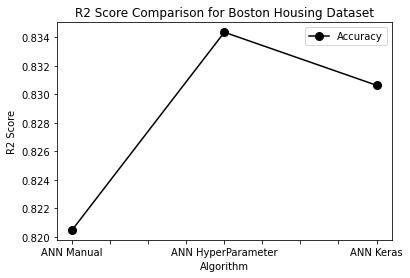

In [21]:
df = pd.DataFrame({'Algorithm': ['ANN Manual', 'ANN HyperParameter', 'ANN Keras'],
                   'Accuracy': [score_manual, score, r2]})
df['Accuracy'] = df['Accuracy'].astype(float)
fig, ax = plt.subplots()
df.plot('Algorithm', 'Accuracy', kind='line', ax=ax, color="black", marker='o', markersize=8)
plt.title('R2 Score Comparison for Boston Housing Dataset')
plt.xlabel('Algorithm')
plt.ylabel('R2 Score')
plt.show()
